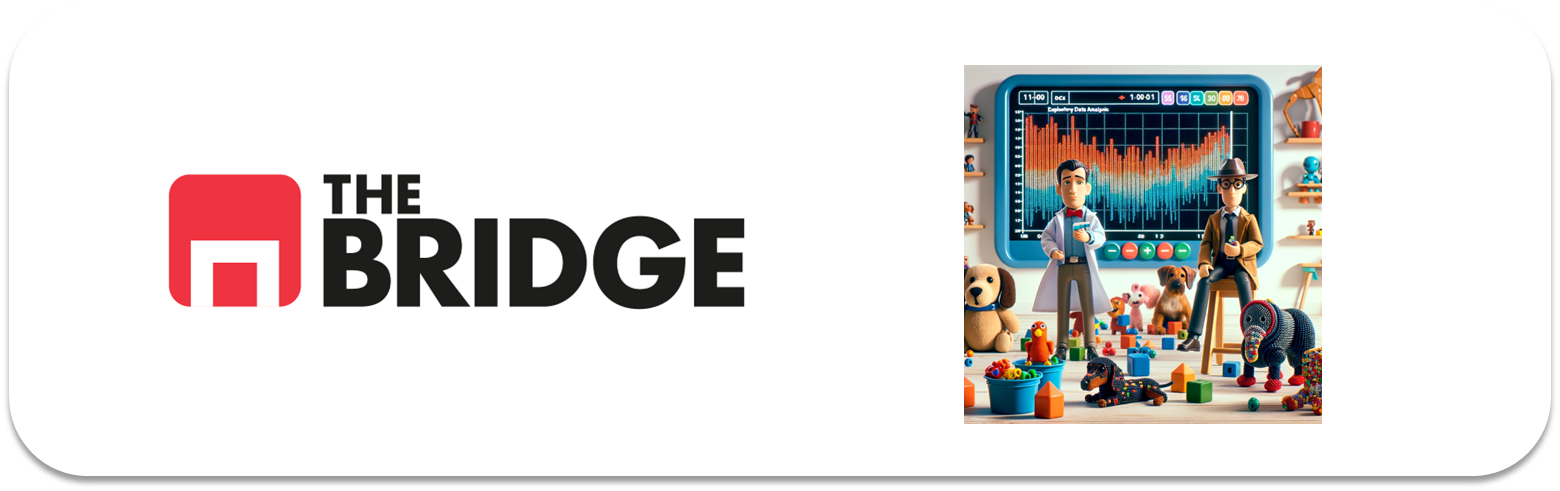

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [130]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [131]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [132]:
df_titanic.drop(columns = ["deck", "survived", "pclass", "embarked"], inplace = True)

In [133]:
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [134]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.drop(columns = ["parch", "sibsp"], inplace = True)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [135]:
df_titanic["embark_town"].mode()

0    Southampton
Name: embark_town, dtype: object

In [136]:
df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0], inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17696\162052660.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0], inplace = True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [137]:
df_titanic["who"].unique()

array(['man', 'woman', 'child'], dtype=object)

In [138]:
# df_titanic.groupby("who")["age"] --> Divide el DataFrame en 3 grupos: Man, Women, Child. Sólo se selecciona la columna ["age"]
# .transform() --> Columna completa para asignarla a ["age"]. Aplica función a cada grupo, manteniendo longitud columna original
# lambda x: x.fillna(x.mean()) --> lambda: Define una función rápida sin tener que hacer def, x = "age", x.mean() = media del grupo

df_titanic["age"] = df_titanic.groupby("who")["age"].transform(lambda x: x.fillna(x.mean()))

In [139]:
df_titanic["age"].isna().sum()

np.int64(0)

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

In [140]:
df_titanic.nunique()

sex                 2
age                89
fare              248
class               3
who                 3
adult_male          2
embark_town         3
alive               2
alone               2
family_members      9
dtype: int64

In [141]:
def card (df_titanic, umbral_categoria, umbral_continua):
    
    cardinalidad = df_titanic.nunique()
    porcentaje_card = df_titanic.nunique()/len(df_titanic) * 100
    tipos = []

    for col in df_titanic.columns:
        card = cardinalidad[col]
        pct = porcentaje_card[col]

        if card == 2:
            tipos.append("Binaria")
        
        elif card <= umbral_categoria:
            tipos.append("Categórica")
   
        else: 
            if pct >= umbral_continua:
                tipos.append("Numérica Continua")
            else:
                tipos.append("Numérica Discreta")

    
    df_resultado = pd.DataFrame({"Cardinalidad" : cardinalidad, "% Cardinalidad" : porcentaje_card, "Tipo Variable": tipos})
    return df_resultado

In [142]:
card(df_titanic, 6, 9)

,Cardinalidad,% Cardinalidad,Tipo Variable
sex,2,0.224467,Binaria
age,89,9.988777,Numérica Continua
fare,248,27.833895,Numérica Continua
class,3,0.336700,Categórica
who,3,0.336700,Categórica
adult_male,2,0.224467,Binaria
embark_town,3,0.336700,Categórica
alive,2,0.224467,Binaria
alone,2,0.224467,Binaria
family_members,9,1.010101,Numérica Discreta


In [143]:
'''
Variables Categóricas:
- sex
- alive
- who
- class
- embark_town
- alone
'''

categoricas = [
    "alive",
    "who",
    "sex",
    "class",
    "embark_town",
    "alone"
]

In [144]:
# Tendencia central: Moda

df_titanic[categoricas].mode().T

,0
alive,no
who,man
sex,male
class,Third
embark_town,Southampton
alone,True


In [145]:
# Frecuencias absolutas
for categoria in categoricas:
    print(f"Para {categoria}")
    print(df_titanic[categoria].value_counts(), "\n")


Para alive
alive
no     549
yes    342
Name: count, dtype: int64 

Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64 

Para sex
sex
male      577
female    314
Name: count, dtype: int64 

Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64 

Para embark_town
embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64 

Para alone
alone
True     537
False    354
Name: count, dtype: int64 



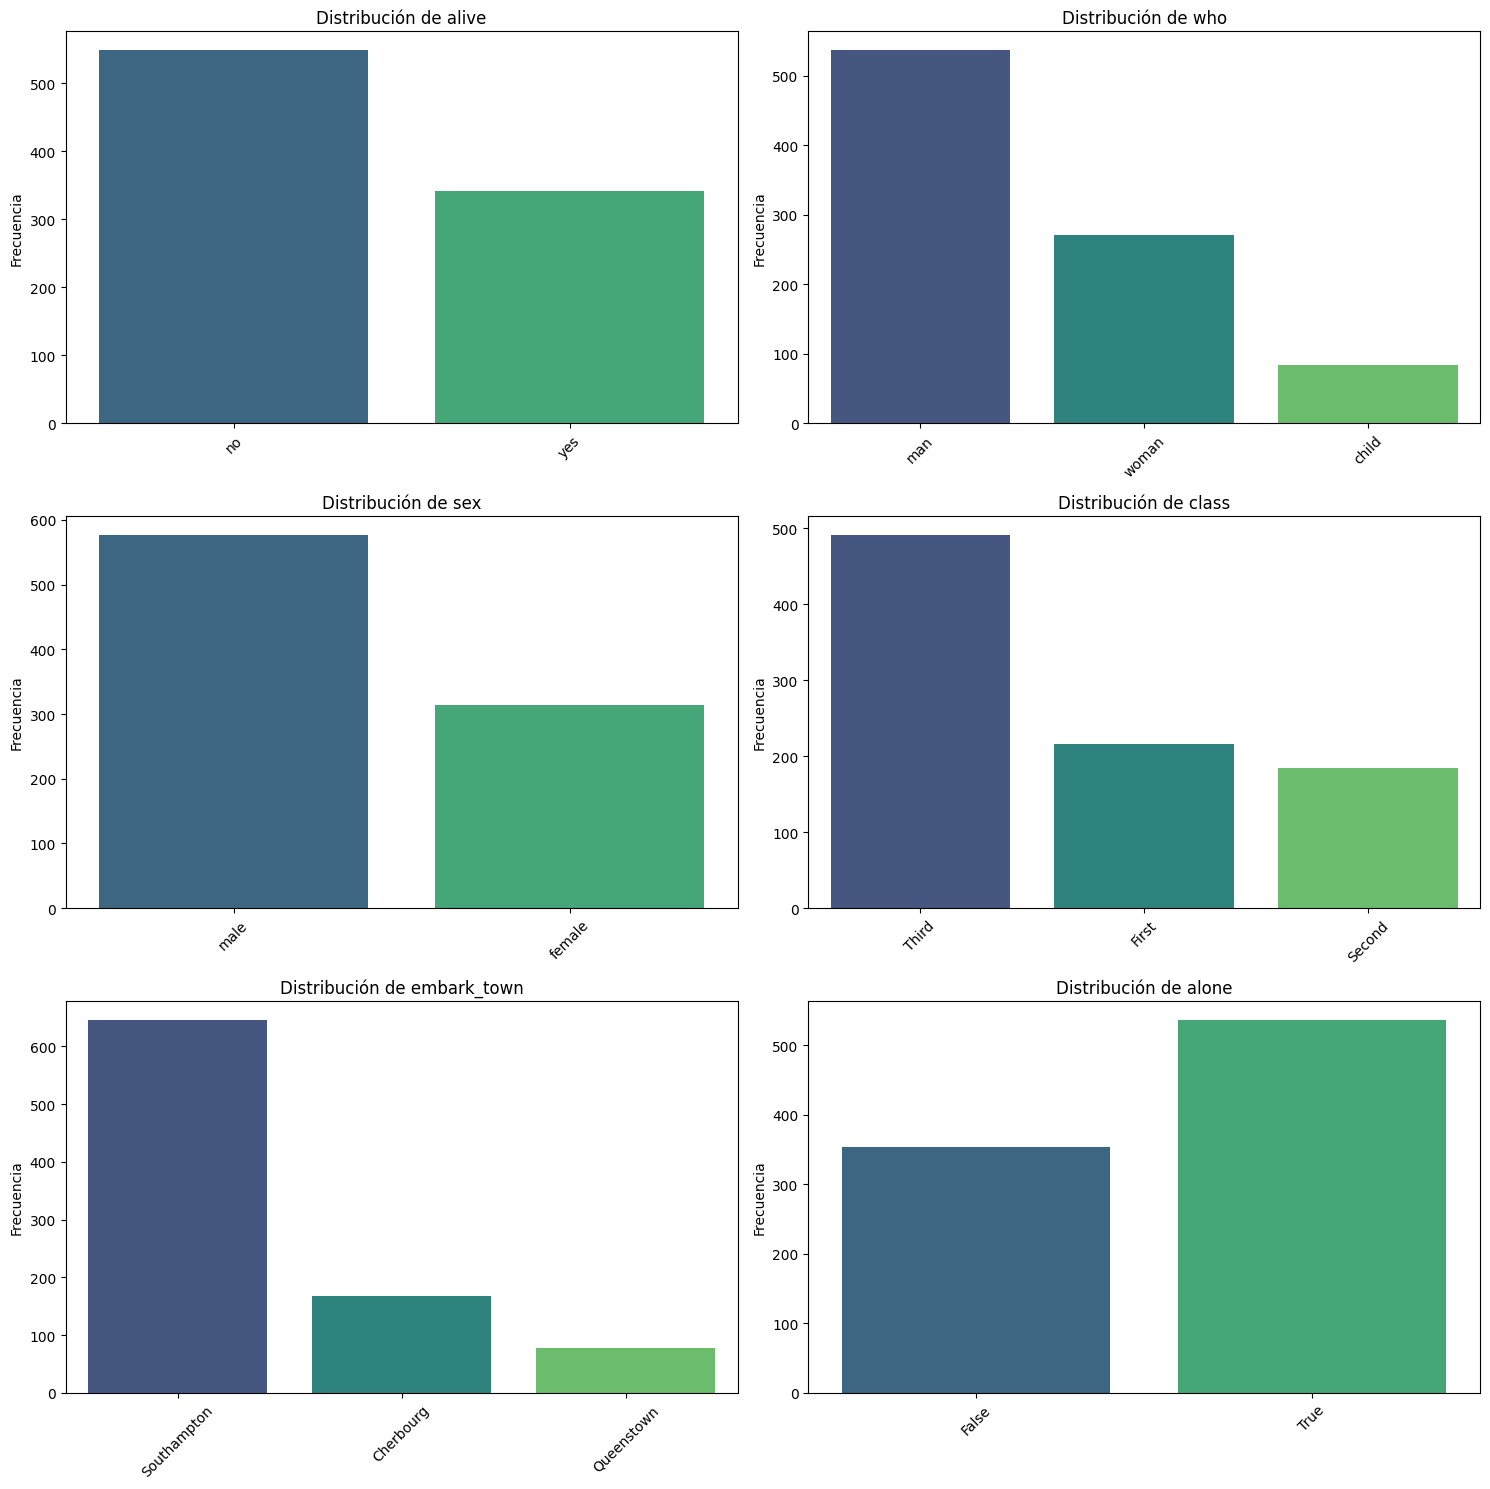

In [146]:
# Visualización:


def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False): 
    
    num_columnas = len(columnas_categoricas)
    
    num_filas = (num_columnas // 2) + (num_columnas % 2)
    
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten()

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i] 

        if relativa:
            total = df[col].value_counts().sum() 
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')

        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')
        
        ax.set_title(f'Distribución de {col}') 
        ax.set_xlabel('') 
        ax.tick_params(axis='x', rotation=45) 

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')
       
    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    
    plt.tight_layout() 
    plt.show()

pinta_distribucion_categoricas(df_titanic, categoricas)

In [147]:
# Frecuencias relativas --> Proporción de cada valor
for categorica in categoricas:
    print(f"Para {categorica}")
    print(df_titanic[categorica].value_counts()/len(df_titanic) * 100)
    print()

Para alive
alive
no     61.616162
yes    38.383838
Name: count, dtype: float64

Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64

Para sex
sex
male      64.758698
female    35.241302
Name: count, dtype: float64

Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64

Para embark_town
embark_town
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64

Para alone
alone
True     60.26936
False    39.73064
Name: count, dtype: float64



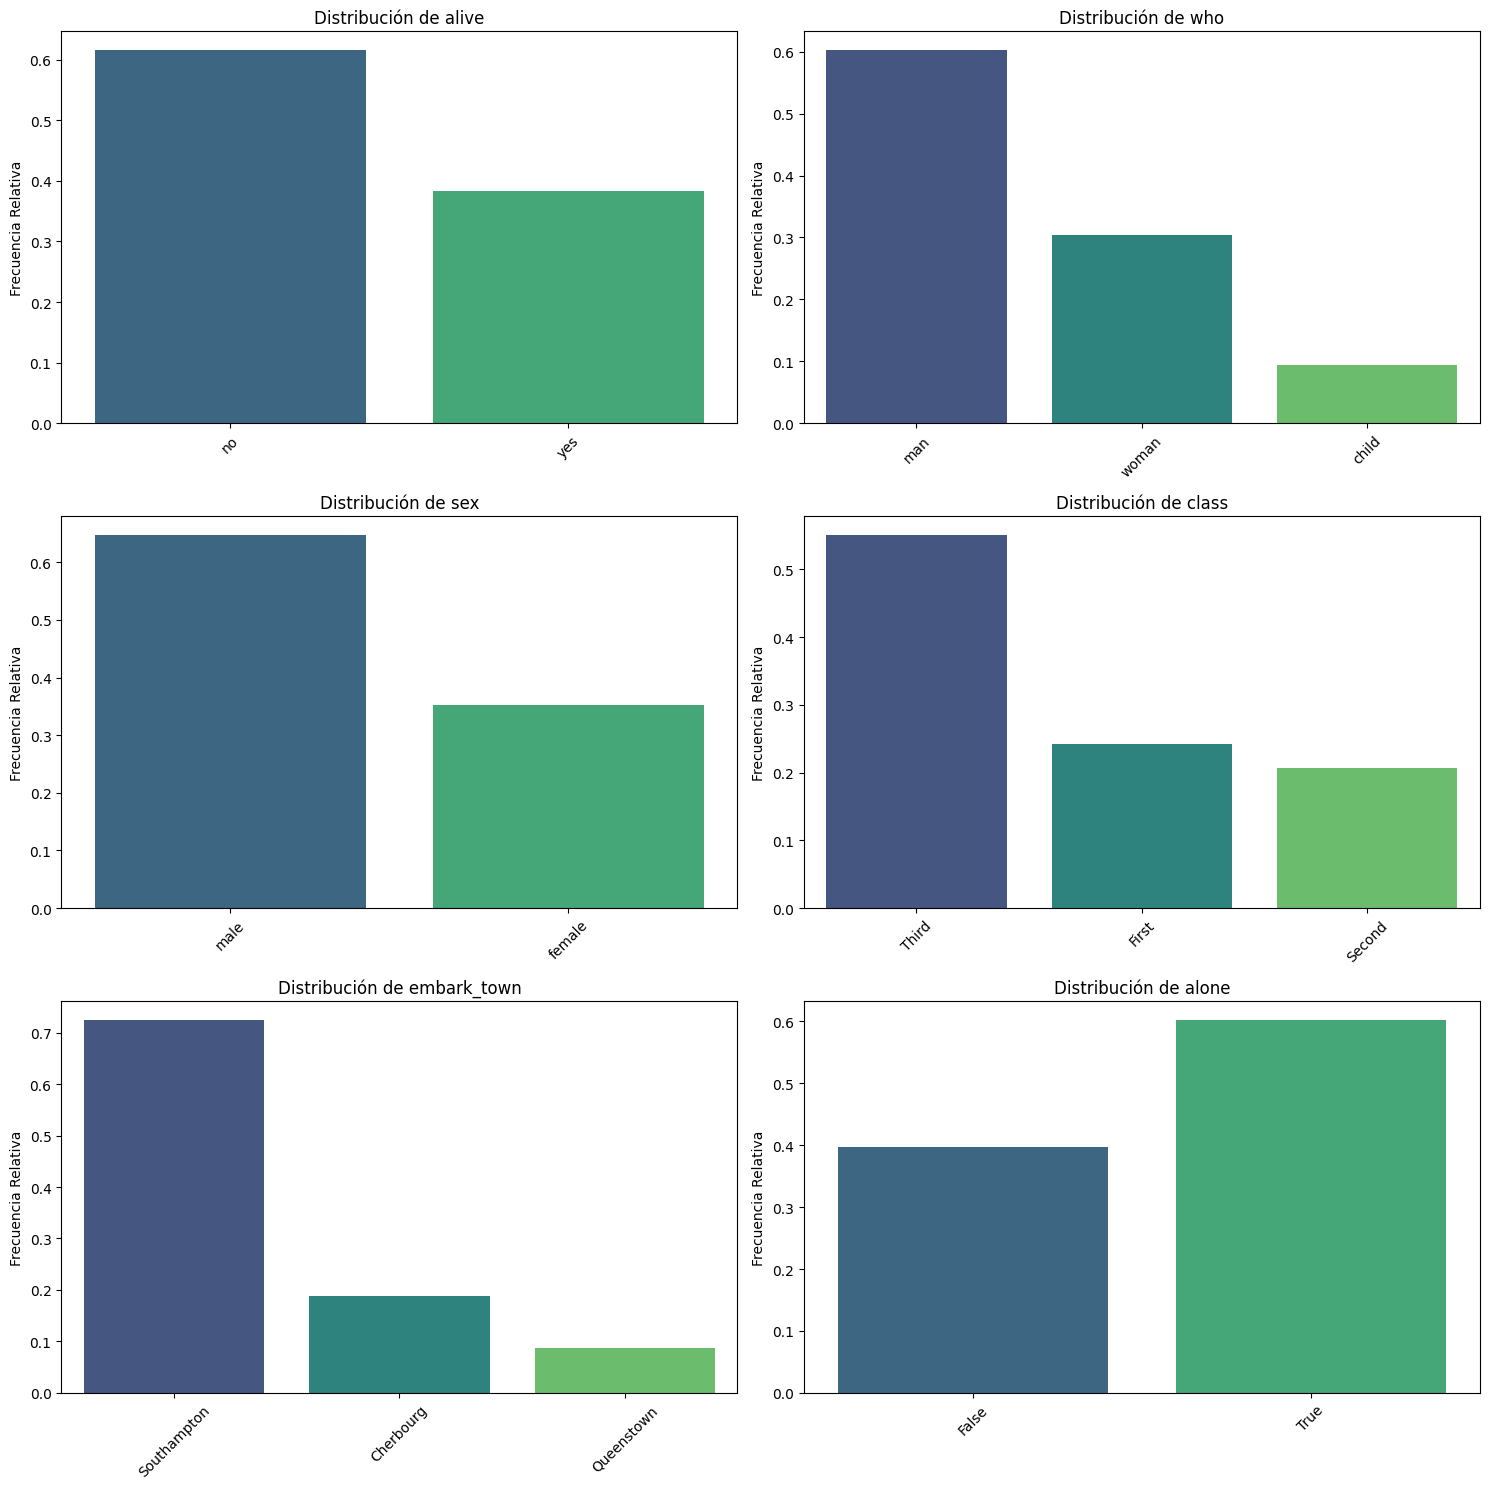

In [148]:
pinta_distribucion_categoricas(df_titanic, categoricas, relativa = True)

In [ ]:
''' 
No hay gran diferencia entre la visualización de frecuencias absolutas y relativas. 

Categóricas :

- Relación supervivencia - sexo. 

- Relación supervivencia - clase.

- Relación supervivencia - ciudad de embarque.

- Relación supervivencia - precio pasaje.

'''

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

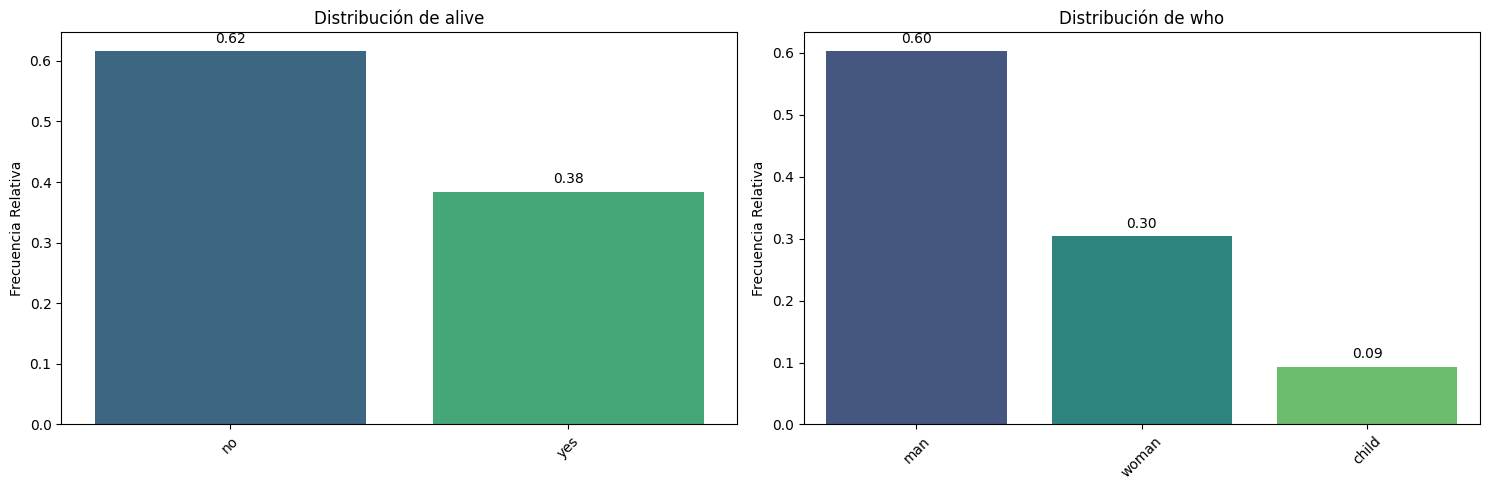

In [149]:
pinta_distribucion_categoricas(df_titanic,["alive","who"], relativa= True, mostrar_valores= True)

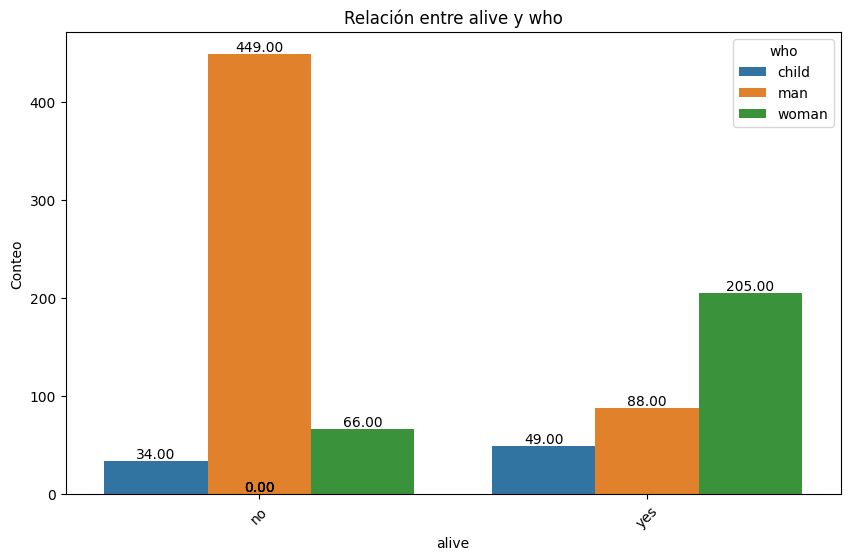

In [150]:
plot_categorical_relationship_fin(df_titanic, "alive","who", show_values= True) # Frecuencias absolutas

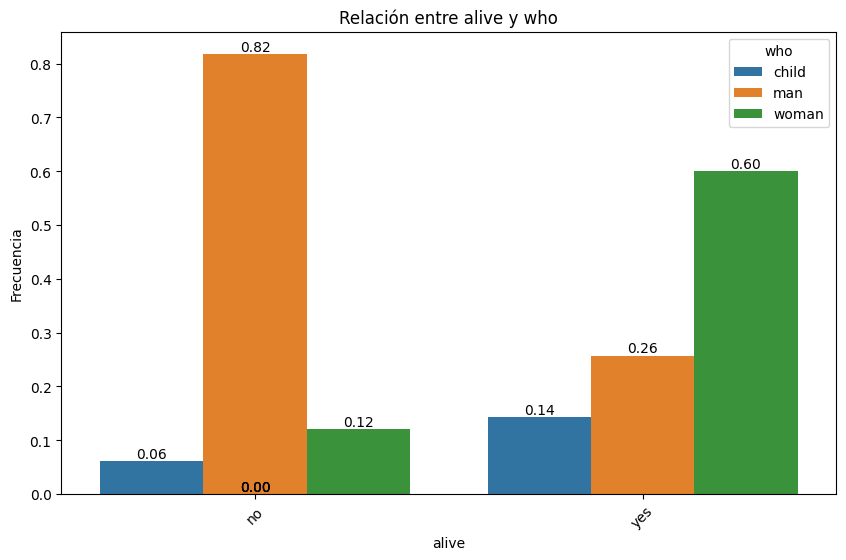

In [151]:
plot_categorical_relationship_fin(df_titanic, "alive","who", relative_freq = True, show_values = True)

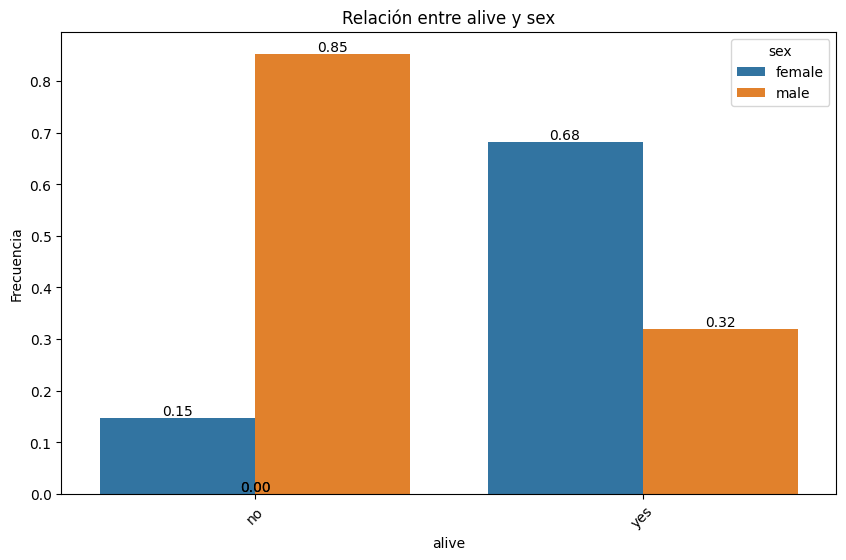

In [152]:
# Relación supervivencia - sexo

plot_categorical_relationship_fin(df_titanic, "alive","sex", relative_freq = True, show_values = True)


In [153]:
# Relación supervivencia - adulto vs. niño

df_titanic["age_group"] = df_titanic["who"].apply(lambda x: "child" if x == "child" else "adult")


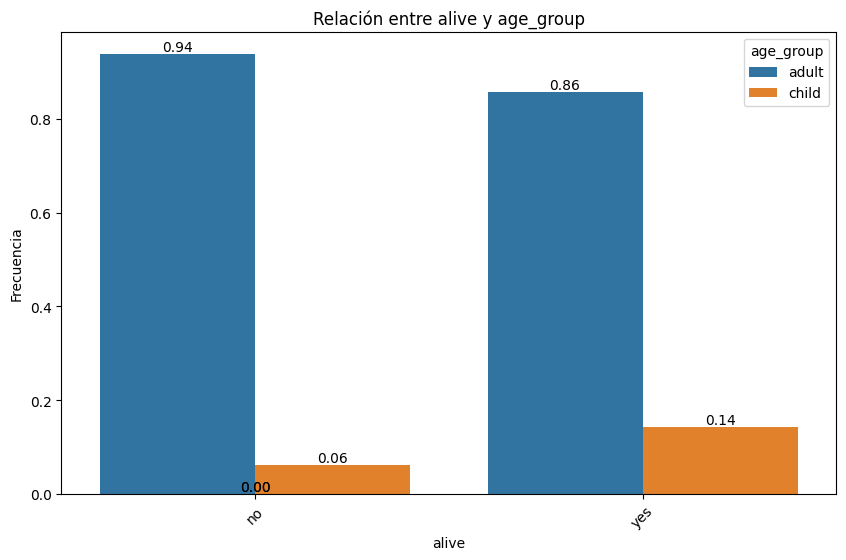

In [154]:
# Relación supervivencia - sexo

plot_categorical_relationship_fin(df_titanic, "alive","age_group", relative_freq = True, show_values = True)

In [155]:
df_titanic["age_group"].value_counts()

age_group
adult    808
child     83
Name: count, dtype: int64

In [156]:
((df_titanic["age_group"] == "child") & (df_titanic["alive"] == "yes")).sum()

np.int64(49)

In [ ]:
'''
Tanto en términos absolutos como relativos, sobrevivieron más mujeres.

En cuanto a supervivencia en cuanto al sexo, se observa que hay una relación significativa en cuanto a la supervivencia y el sexo, 
en favor de las mujeres (murieron más hombres que mujeres, con una diferencia mostrada en el gráfico bastante significativa).

En cuanto a la supervivencia según ser adulto vs niño, se ve una diferencia muy marcada en la que tanto la supervivencia como el 
fallecimiento, los adultos superan con una gran diferencia a los niños. Pero en este caso, creo que hay que tener en cuenta el número de
niños con respecto a los adultos. De los 891 pasajeros, sólo 83 eran niños, por lo que es coherente que la gráfica determine que 
sobrevivieron más adultos que niños.

Si se observa sólamente a los niños, podemos ver que han sobrevivido algo más que la mitad de los niños
'''

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

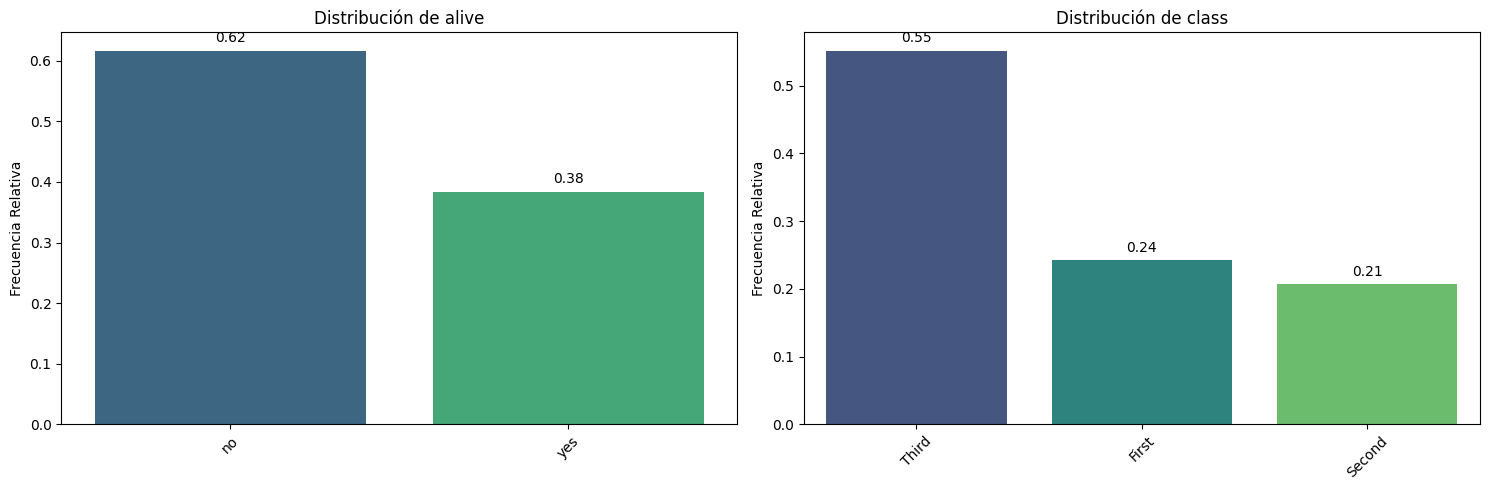

In [157]:
pinta_distribucion_categoricas(df_titanic,["alive","class"], relativa= True, mostrar_valores= True)

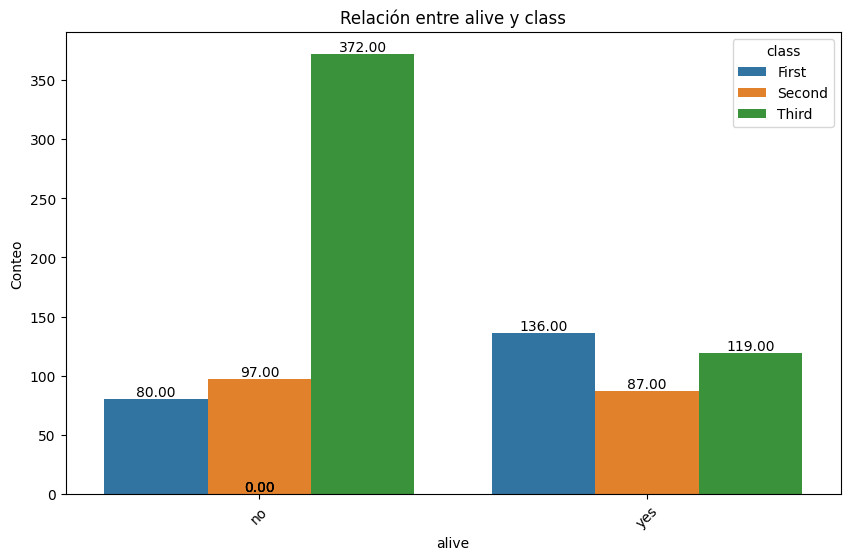

In [158]:
# Frecuencia absoluta

plot_categorical_relationship_fin(df_titanic, "alive","class", show_values = True)

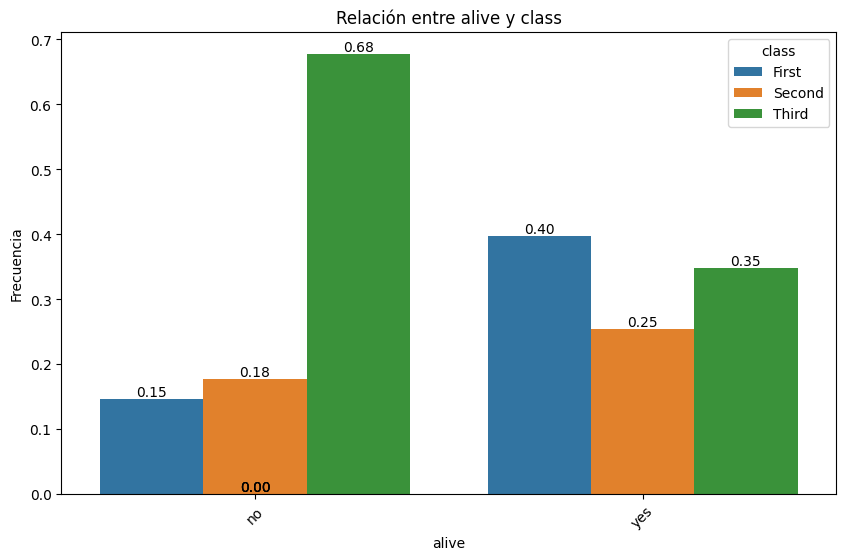

In [159]:
# Frecuencia relativa

plot_categorical_relationship_fin(df_titanic, "alive","class", relative_freq = True, show_values = True)

In [160]:
# Relación:

tabla_contingencia = pd.crosstab(df_titanic['alive'], df_titanic['class'])
tabla_contingencia

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [161]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2, "\n")
print("P-Value:", p, "\n")
print("Grados de Libertad:", dof, "\n")
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056 

P-Value: 4.549251711298793e-23 

Grados de Libertad: 2 

Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [ ]:
'''
Observando ambos gráficos, se puede observar que tanto en cuanto a términos absolutos como relativos, hay una correlación muy marcada 
entre la supervivencia entre una clase y otra. Creo que en este caso, estos gráficos se ven influenciados directamente por la diferencia
de localización de unos camarotes frente a otros. También, como en el caso anterior de los niños, creo que el gran número de pasajeros
de tercera clase, frente a los pocos pasajeros de primera y segunda, inclina a distribución a la observada en los gráficos.

Sin embargo, el test Chi2, con un p-valor mucho más pequeño que 0.05, confirma esa relación estadísticamente significativa entre "alive"
y "class" (aunque sigo creyendo que se ve influenciada por el número de personas de tercera clase, mucho mayor que en las otras dos).

'''

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

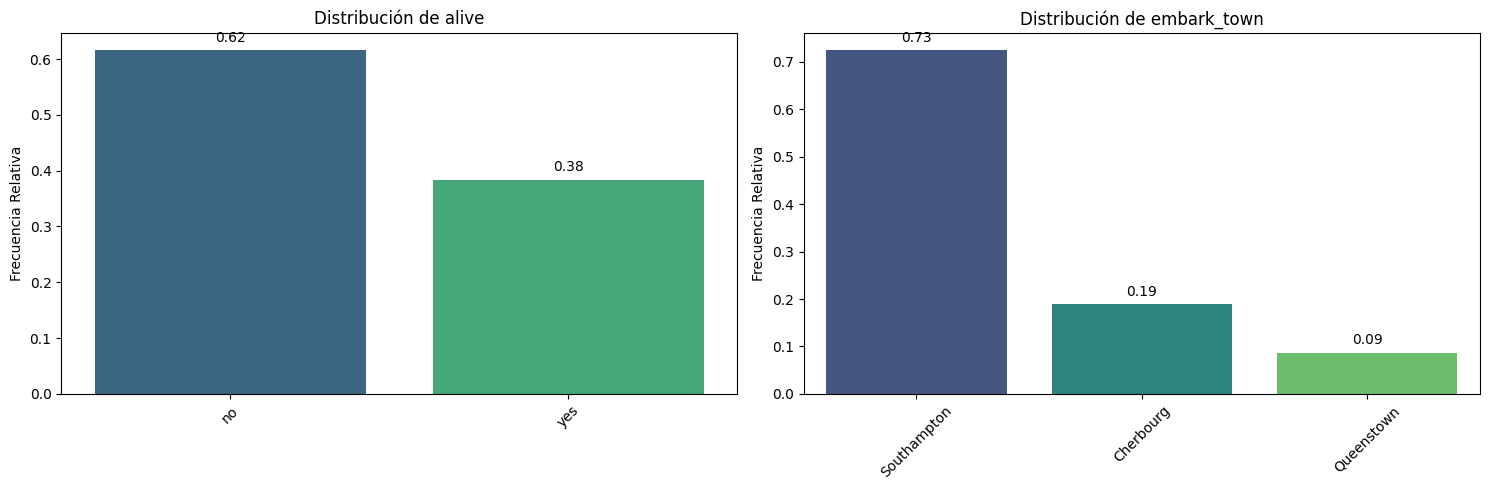

In [162]:
pinta_distribucion_categoricas(df_titanic,["alive","embark_town"], relativa= True, mostrar_valores= True)

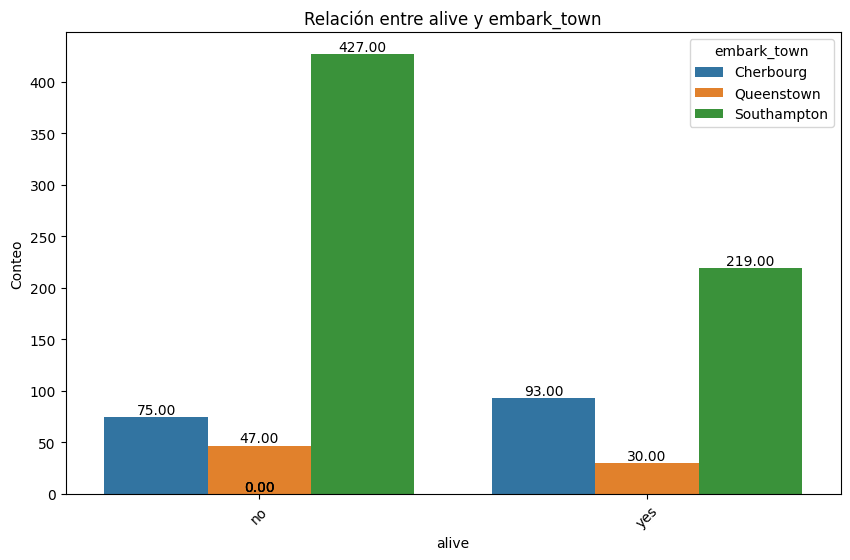

In [163]:
# Frecuencia absoluta

plot_categorical_relationship_fin(df_titanic, "alive","embark_town", show_values = True)

In [164]:
# De qué ciudad sobrevivieron más personas? --> Southampton

tabla_contingencia2 = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'])
tabla_contingencia2

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,75,47,427
yes,93,30,219


In [165]:
# De qué ciudad sobrevivieron más personas (porcentualmente)? --> Southampton

tabla_contingencia3 = pd.crosstab(df_titanic['alive'], df_titanic['embark_town'], normalize = "index") # Para cada fila, convierte conteos en porcentajes dentro de esa fila
tabla_contingencia3

embark_town,Cherbourg,Queenstown,Southampton
alive,,,
no,0.136612,0.085610,0.777778
yes,0.271930,0.087719,0.640351


In [166]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia2)


print("Valor Chi-Cuadrado:", chi2, "\n")
print("P-Value:", p, "\n")
print("Grados de Libertad:", dof, "\n")
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784 

P-Value: 2.3008626481449577e-06 

Grados de Libertad: 2 

Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


In [ ]:
'''
Observando los gráficos, se aprecia un mayor número de supervivientes embarcados en Southampton con respecto a las otras ciudades.

Al realizar el test Chi2, se obtiene un p-valor mucho más bajo que 0.05, por lo que se puede afirmar (según dicho test), que existe
una correlación positiva entre la supervivencia y la ciudad de embarque. De todas maneras, considero importante analizar la clase
de los pasajeros que embarcaron en cada ciudad, dado que es posible que esa diferencia se deba a que gran parte de los pasajeros que
embarcaron en dicha ciudad fueran de tercera clase, con un número mucho más elevado de pasajeros que las otras dos clases.

Esto me lleva a pensar que este último análisis puede ser dependiente del número de personas embarcadas pertenecientes a tercera clase,
y que puede estar sesgado por este motivo.

'''

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

In [167]:
numericas = [
    "age",
    "fare",
    "family_members"
]

numericas

['age', 'fare', 'family_members']

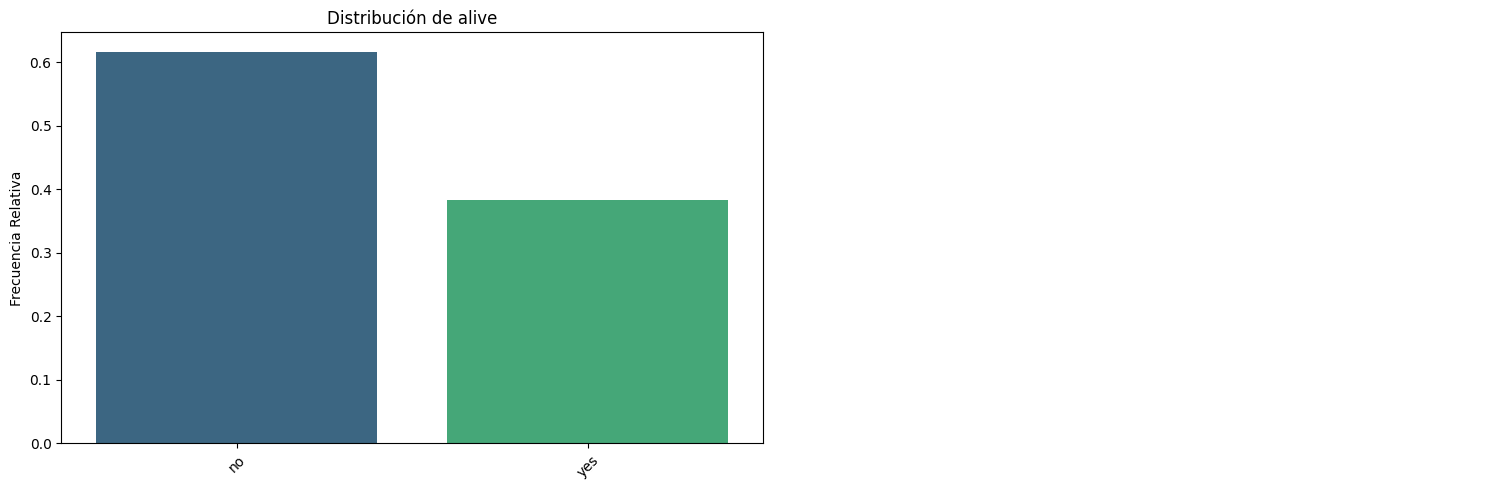

In [168]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True)

(2,)


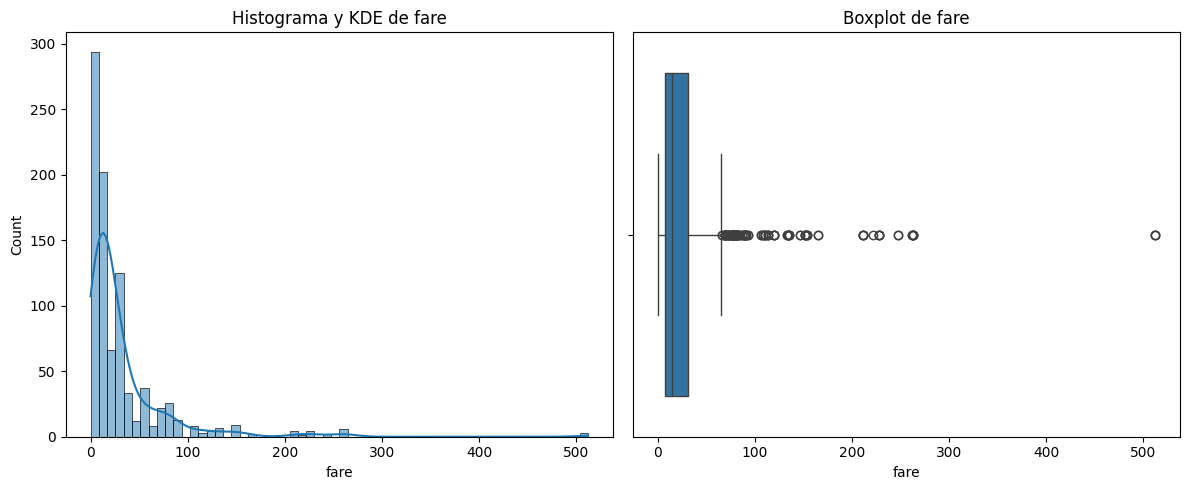

In [169]:
plot_combined_graphs(df_titanic, ["fare"])

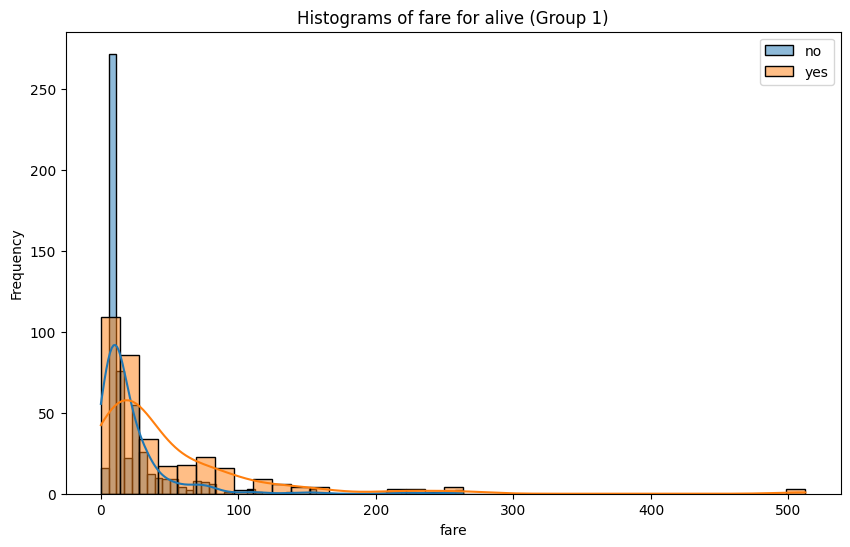

In [170]:
plot_grouped_histograms(df_titanic, "alive","fare",group_size= 4)

In [ ]:
'''
En principio, lo que se analiza de este gráfico combinado es que parece que la supervivencia se encuentra concentrada en torno a los precios
bajos del billete, aunque existe un pico elevado de pasajeros fallecidos en torno a los precio más bajos también. Considero que esto también 
tiene que ver con la cantidad de pasajeros de tercera clase con respecto a los pasajeros de las otras dos. Creo que puede existir sesgo en 
ese sentido.
'''

In [171]:
# ANOVA
grupos = df_titanic['alive'].unique()  # Obtener los valores únicos de la columna categórica (supervivencia)
fare_alive = [df_titanic[df_titanic['alive'] == grupo]['fare'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
fare_alive

[0       7.2500
 4       8.0500
 5       8.4583
 6      51.8625
 7      21.0750
         ...   
 884     7.0500
 885    29.1250
 886    13.0000
 888    23.4500
 890     7.7500
 Name: fare, Length: 549, dtype: float64,
 1      71.2833
 2       7.9250
 3      53.1000
 8      11.1333
 9      30.0708
         ...   
 875     7.2250
 879    83.1583
 880    26.0000
 887    30.0000
 889    30.0000
 Name: fare, Length: 342, dtype: float64]

In [172]:

f_val, p_val = stats.f_oneway(*fare_alive)  
                                                    
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 63.03076422804447
Valor p: 6.120189341924269e-15


In [ ]:
'''
Hipótesis nula --> No hay relación entre el precio del billete y la supervivencia. La media del precio billete es igual en los que 
sobrevivieron y fallecieron.

Hipótesis alternativa --> El precio del billete sí está relacionado con la supervivencia. La media del precio del billete es distinta entre
los grupos.

El ANOVA muestra que la media del precio del billete es diferente entre sobrevividos y fallecidos (p: 6.12...e-15). Aunque Los datos se 
concentran en la tarifa baja, tarifas bajas, los supervivientes también datos de tarifas altas pagadas por personas de la primera clase. 
Estos datos elevan la media del grupo “alive”. Por tanto, los pasajeros con billetes más caros tenían mayor probabilidad de sobrevivir.

'''

5. Existen pasajeros que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [183]:
df_titanic[df_titanic["fare"] == 0][["class"]].value_counts()

class 
Second    6
First     5
Third     4
Name: count, dtype: int64

In [ ]:
'''
Según el contexto histórico:

El impago de billetes puede deberse a pasajeros con viajes gratuitos (empleados, familiares de tripulantes, invitados especiales...),
pasajeros con billetes incluidos en otro pago, tripulantes y personal registrados como pasajeros después del accidente para contabilizar
supervivientes o fallecidos (estos no pagaron billetes, fare = 0)

'''

In [185]:
df_titanic.loc[df_titanic["fare"].idxmax()]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
age_group             adult
Name: 258, dtype: object

In [ ]:
'''
La persona que más pagó por el billete era mujer de 35 años, pagando la cantidad de 512.33 libras, de primera clase. Embarcó en
Cherbourg, no iba a compañada y sobrevivió

'''

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

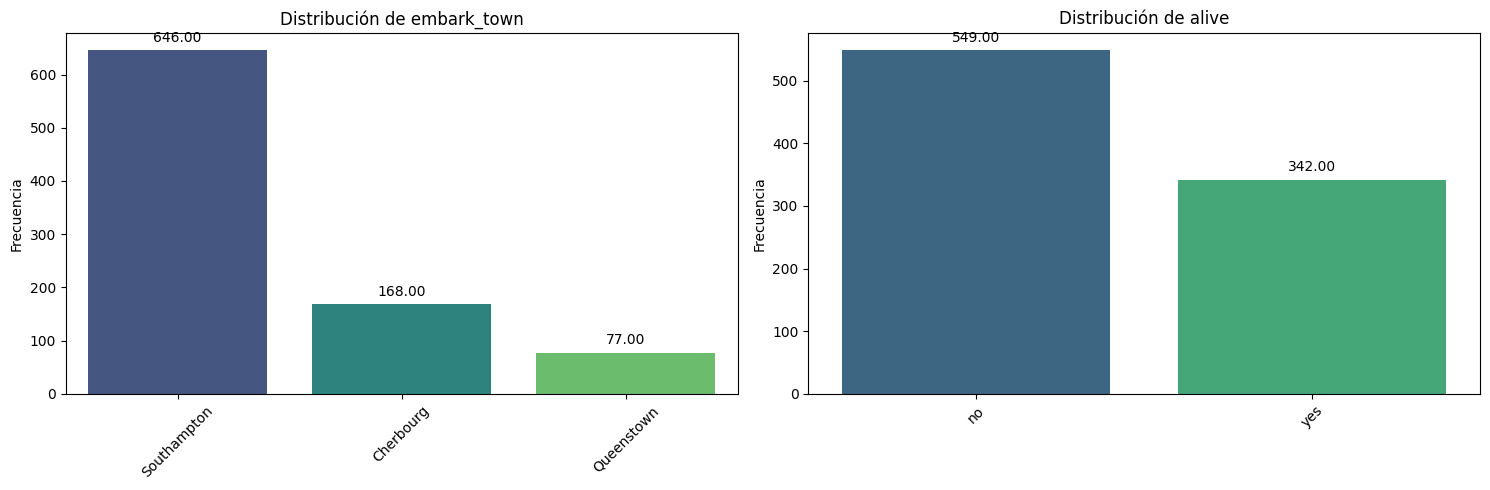

In [189]:
pinta_distribucion_categoricas(df_titanic,["embark_town","alive"], mostrar_valores= True)

In [190]:
df_titanic["embark_alive"] = df_titanic["embark_town"] + " - " + df_titanic["alive"]
df_titanic["embark_alive"]

0       Southampton - no
1        Cherbourg - yes
2      Southampton - yes
3      Southampton - yes
4       Southampton - no
             ...        
886     Southampton - no
887    Southampton - yes
888     Southampton - no
889      Cherbourg - yes
890      Queenstown - no
Name: embark_alive, Length: 891, dtype: object

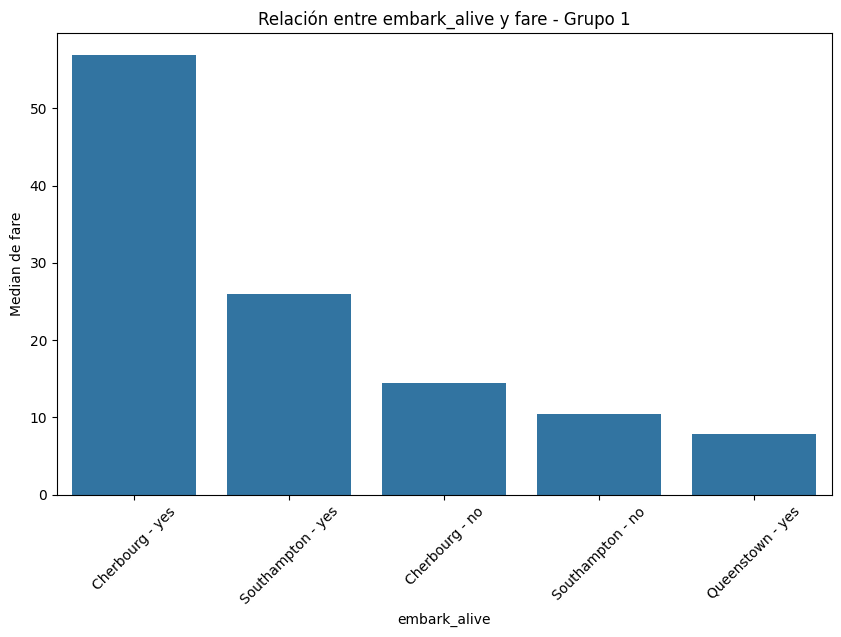

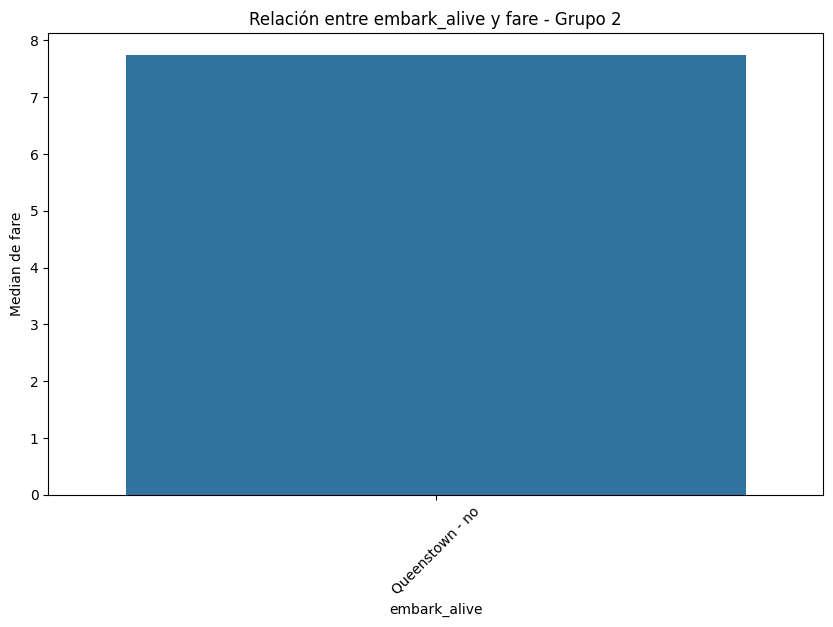

In [191]:
plot_categorical_numerical_relationship(df_titanic,"embark_alive","fare", measure = "median")

In [193]:
grupos = df_titanic['embark_alive'].unique()  
embark_alive_fare = [df_titanic[df_titanic['embark_alive'] == grupo]['fare'] for grupo in grupos] 
embark_alive_fare

[0       7.2500
 4       8.0500
 6      51.8625
 7      21.0750
 12      8.0500
         ...   
 882    10.5167
 883    10.5000
 884     7.0500
 886    13.0000
 888    23.4500
 Name: fare, Length: 427, dtype: float64,
 1       71.2833
 9       30.0708
 19       7.2250
 31     146.5208
 36       7.2292
          ...   
 866     13.8583
 874     24.0000
 875      7.2250
 879     83.1583
 889     30.0000
 Name: fare, Length: 93, dtype: float64,
 2       7.9250
 3      53.1000
 8      11.1333
 10     16.7000
 11     26.5500
         ...   
 865    13.0000
 869    11.1333
 871    52.5542
 880    26.0000
 887    30.0000
 Name: fare, Length: 219, dtype: float64,
 5       8.4583
 16     29.1250
 46     15.5000
 116     7.7500
 126     7.7500
 143     6.7500
 171    29.1250
 188    15.5000
 196     7.7500
 214     7.7500
 245    90.0000
 260     7.7500
 264     7.7500
 278    29.1250
 280     7.7500
 364    15.5000
 388     7.7292
 411     6.8583
 421     7.7333
 428     7.7500
 459     7.7500


In [194]:

f_val, p_val = stats.f_oneway(*embark_alive_fare) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 28.7887513681334
Valor p: 4.11026878696475e-27


In [ ]:
'''
H0 --> La ciudad de embarque y supervivencia no dependen de la tarifa
H1 --> Hay correlación entre la ciudad de embarque y supervivencia con la tarifa abonada

Gracias al p-valor (4.11...e-27), descarto H0 y acepto H1 --> El dinero abonado, parece que constituyó una ventaja a la hora de sobrevivir
al accidente. Por lo tanto, relaciono que gran parte de las personas de primera clase (con una tarifa más alta), embarcaron en Cherbourg, y
la ventaja de ser de esa clase, les proporcionó más posibilidades se supervivencia.

'''

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [198]:
df_titanic["class_age"] = df_titanic["class"] + " - " + df_titanic["age_group"].astype(str)

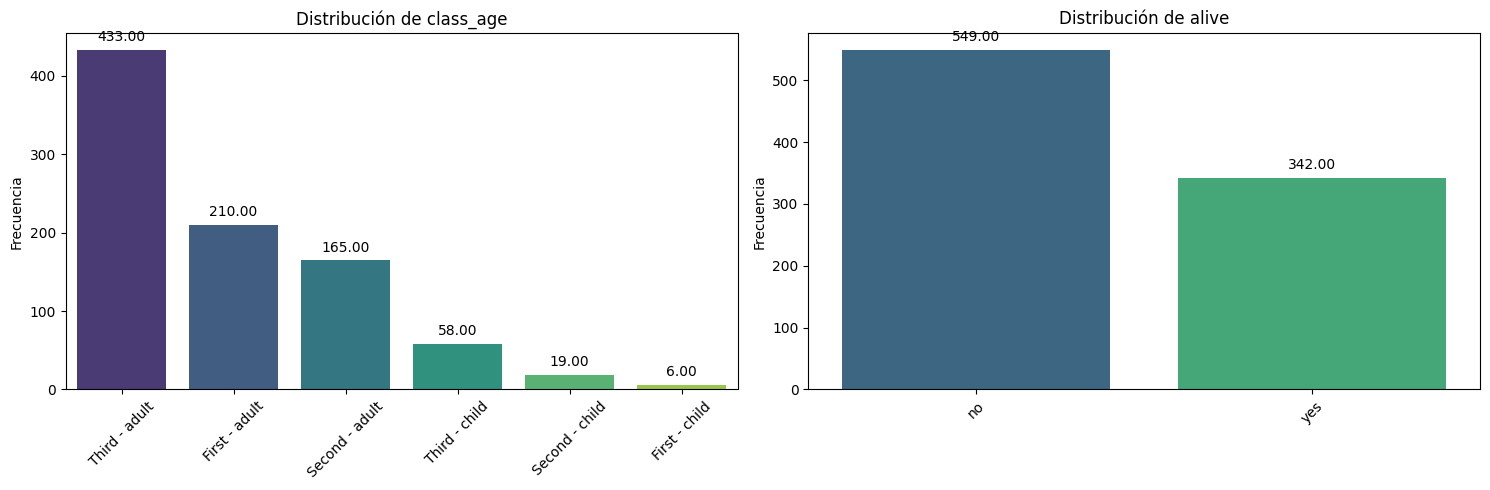

In [209]:
pinta_distribucion_categoricas(df_titanic,["class_age","alive"], mostrar_valores= True)

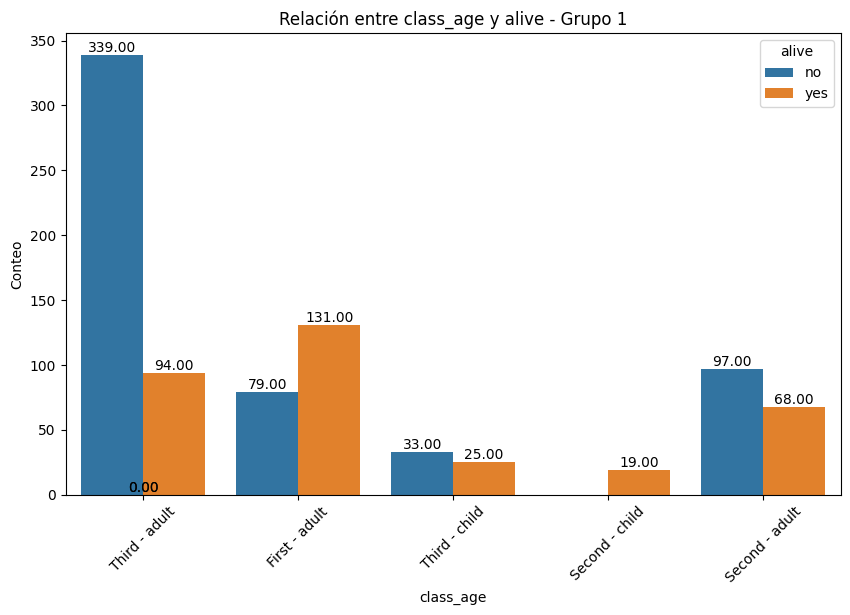

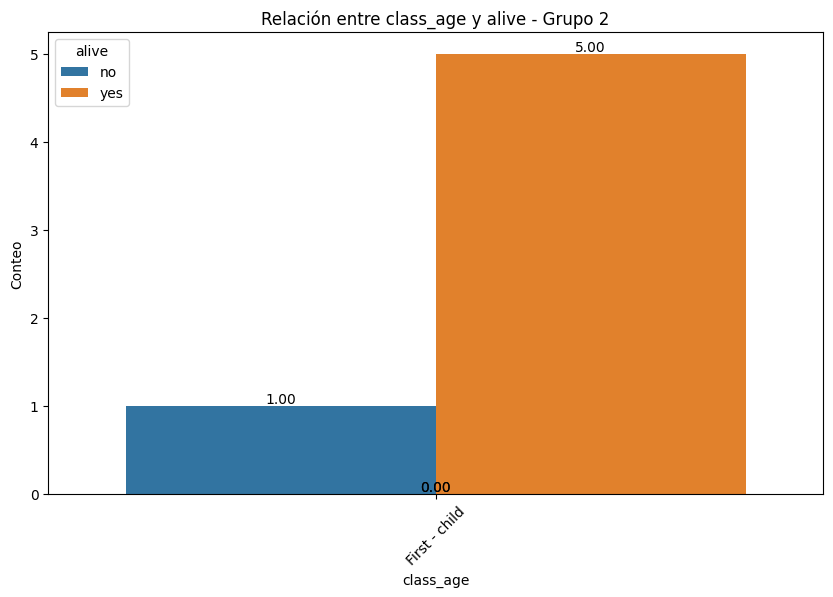

In [203]:
# Absoluta
plot_categorical_relationship_fin(df_titanic, "class_age","alive", show_values = True)

In [206]:
pd.crosstab(df_titanic["class_age"], df_titanic["alive"])

alive,no,yes
class_age,,
First - adult,79,131
First - child,1,5
Second - adult,97,68
Second - child,0,19
Third - adult,339,94
Third - child,33,25


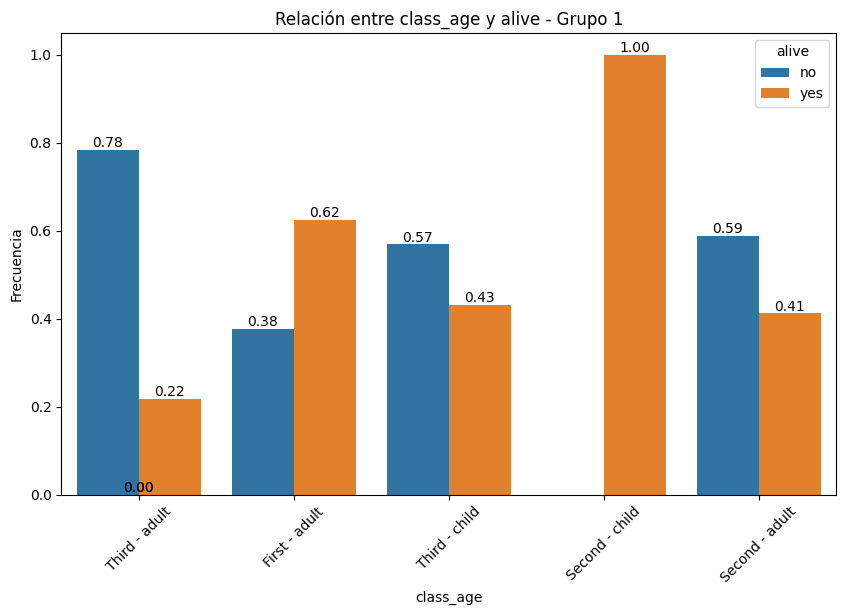

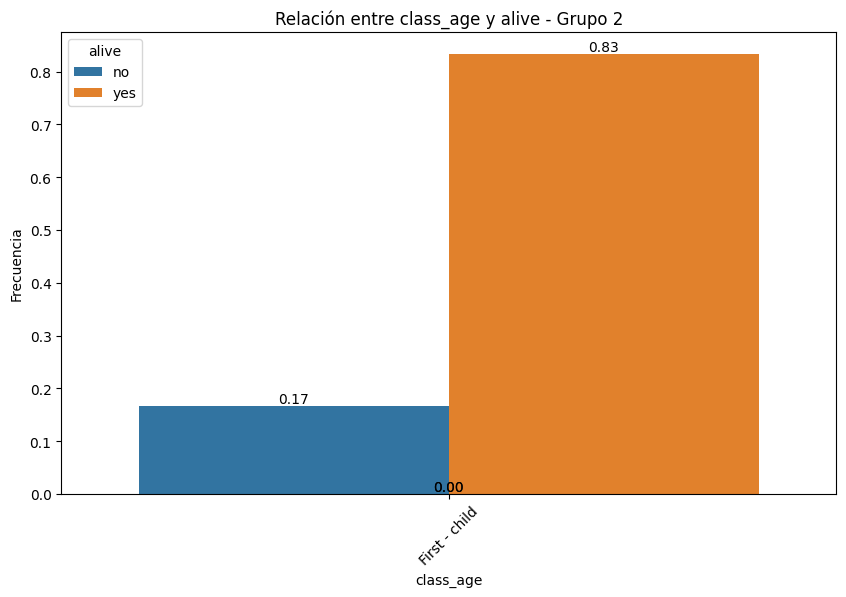

In [205]:
# Relativa
plot_categorical_relationship_fin(df_titanic, "class_age","alive", relative_freq = True, show_values = True)

In [207]:
pd.crosstab(df_titanic["class_age"], df_titanic["alive"], normalize="index")

alive,no,yes
class_age,,
First - adult,0.376190,0.623810
First - child,0.166667,0.833333
Second - adult,0.587879,0.412121
Second - child,0.000000,1.000000
Third - adult,0.782910,0.217090
Third - child,0.568966,0.431034


8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [220]:
# variable directora = Categórica

col_directora = "alive"
col_1 = "fare"
col_2 = "age"
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

Supervivencia no:


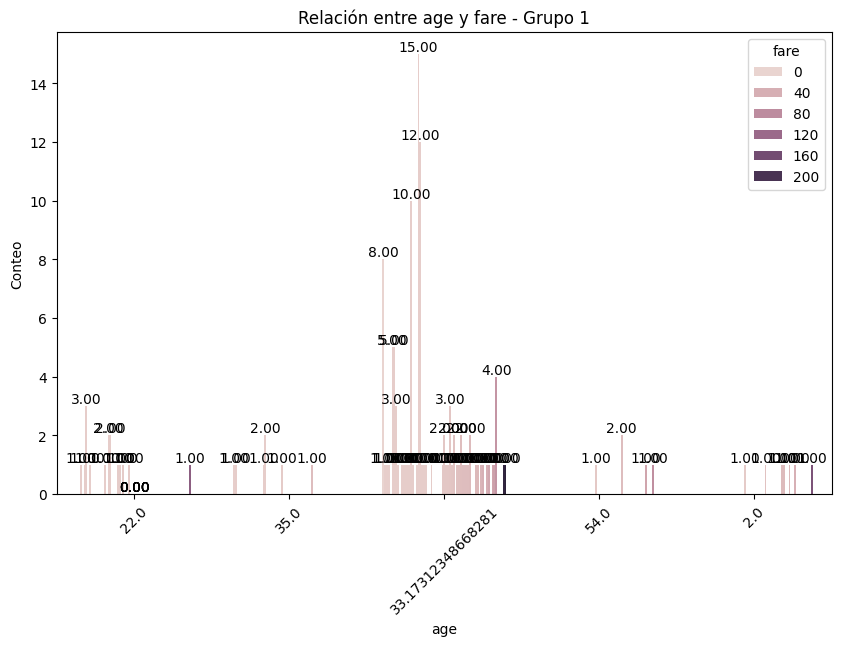

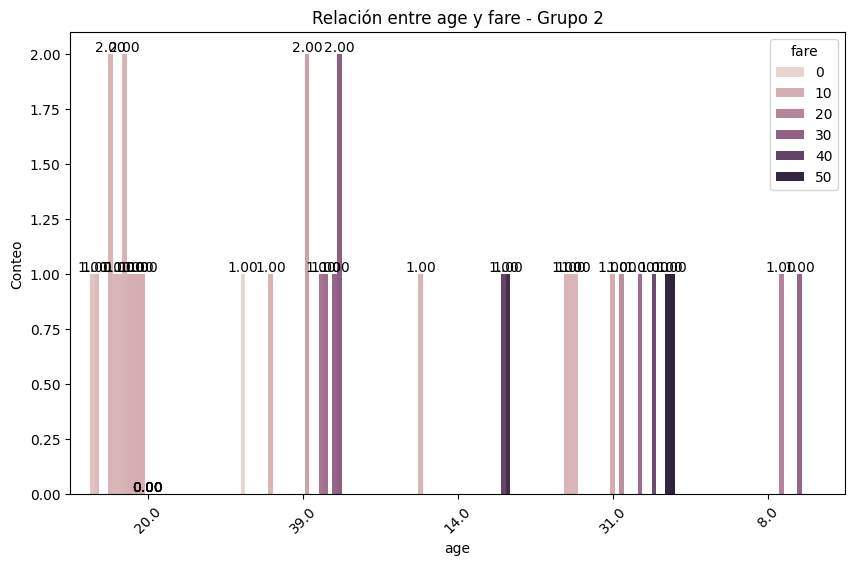

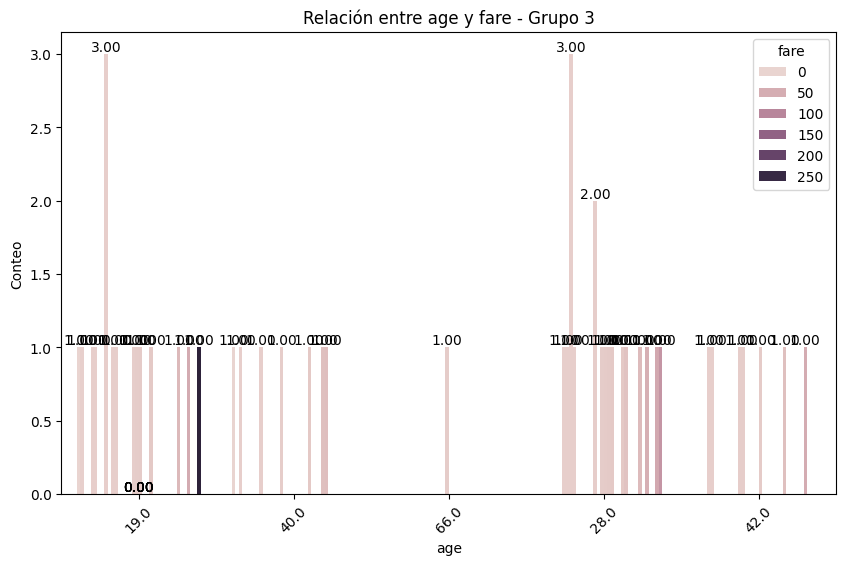

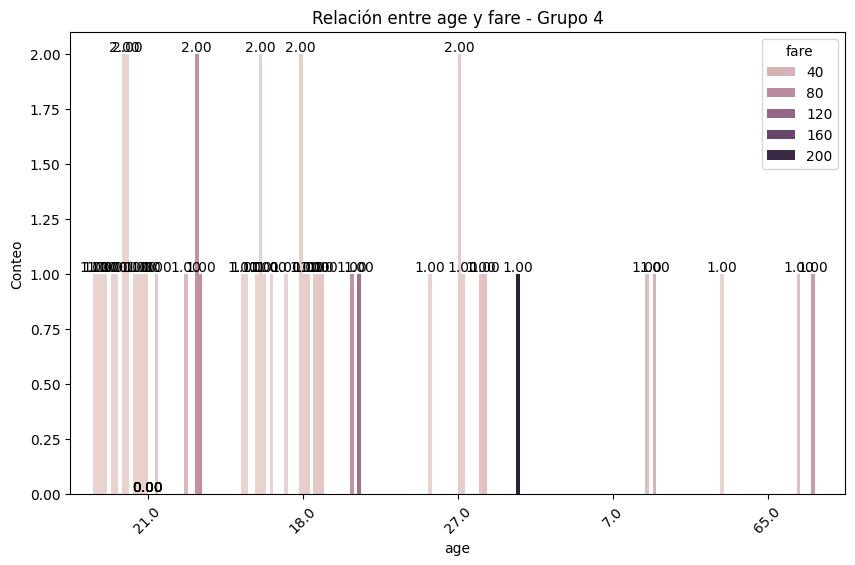

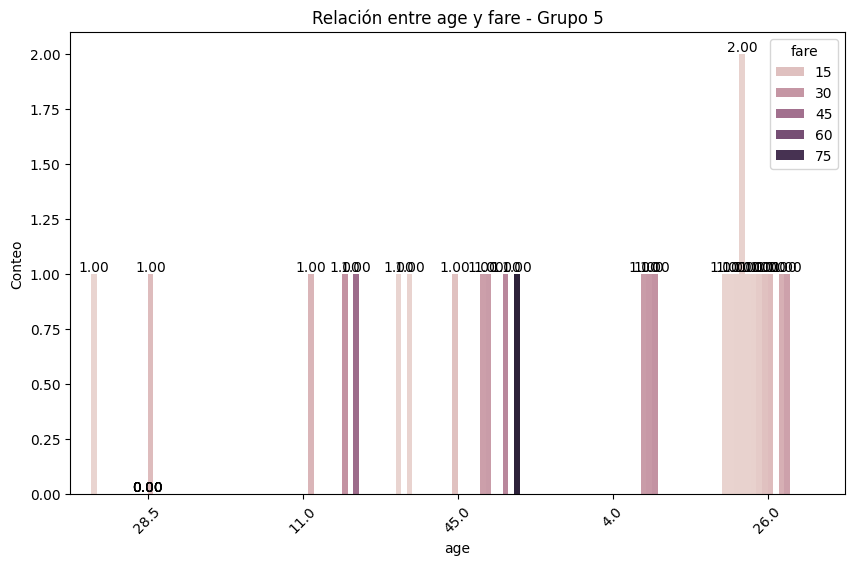

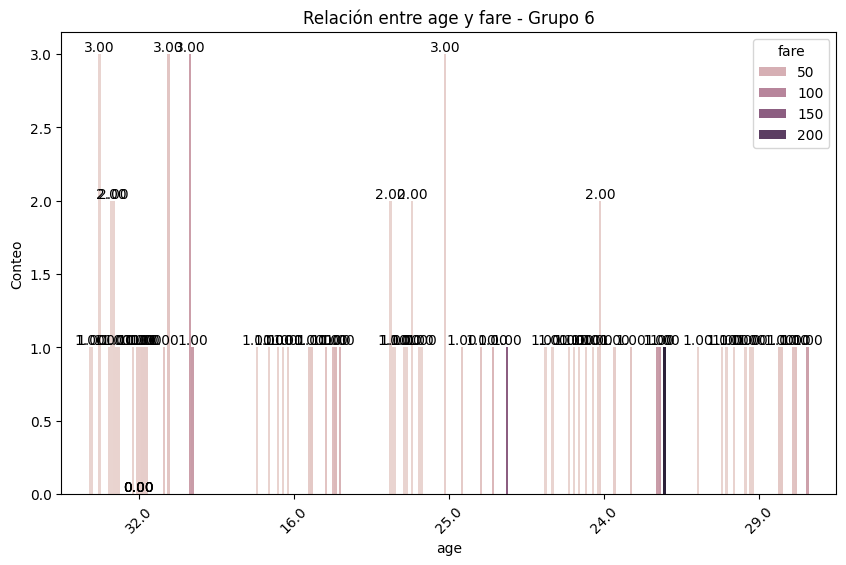

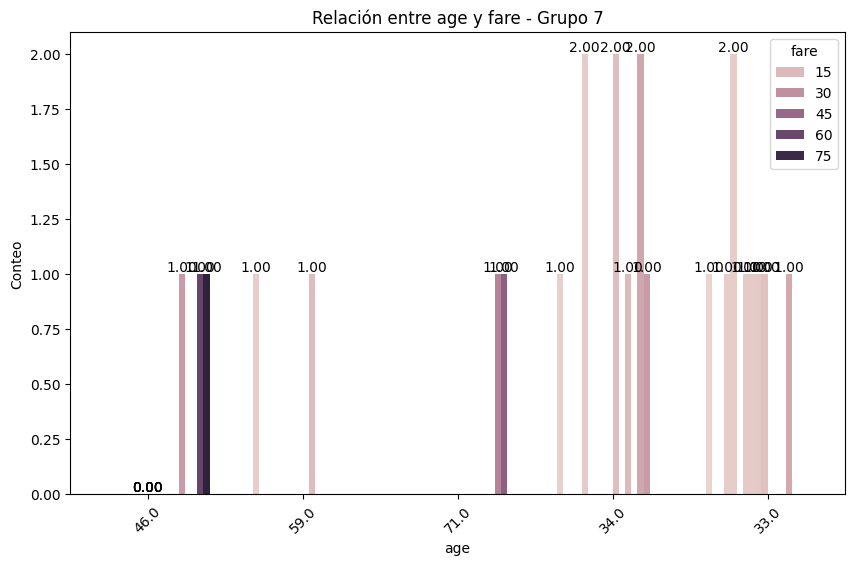

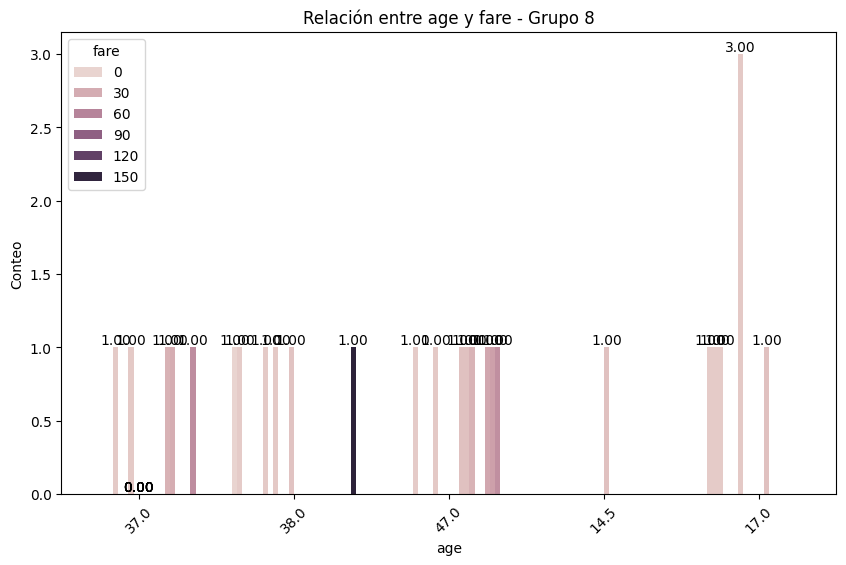

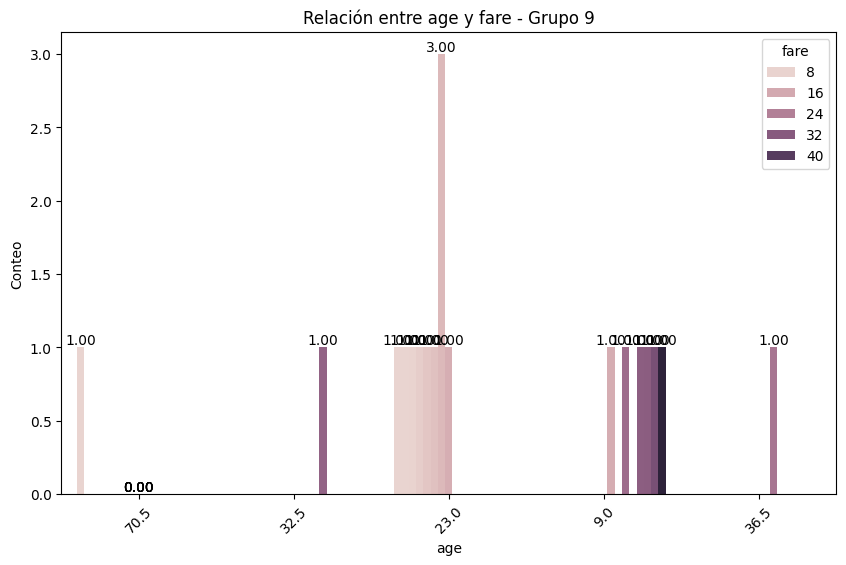

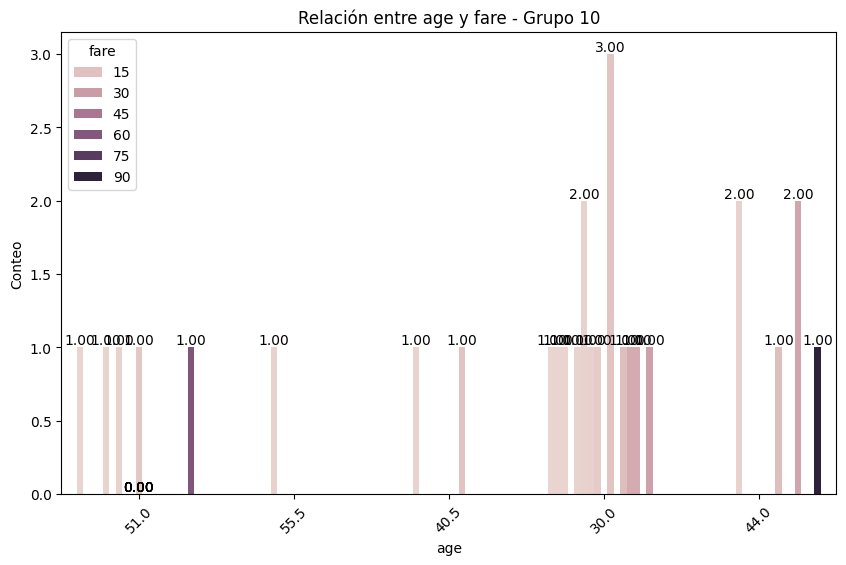

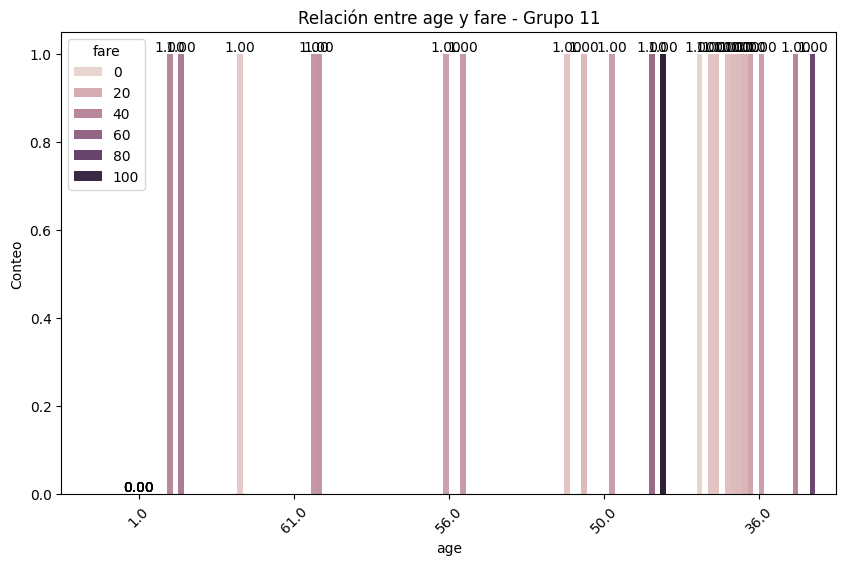

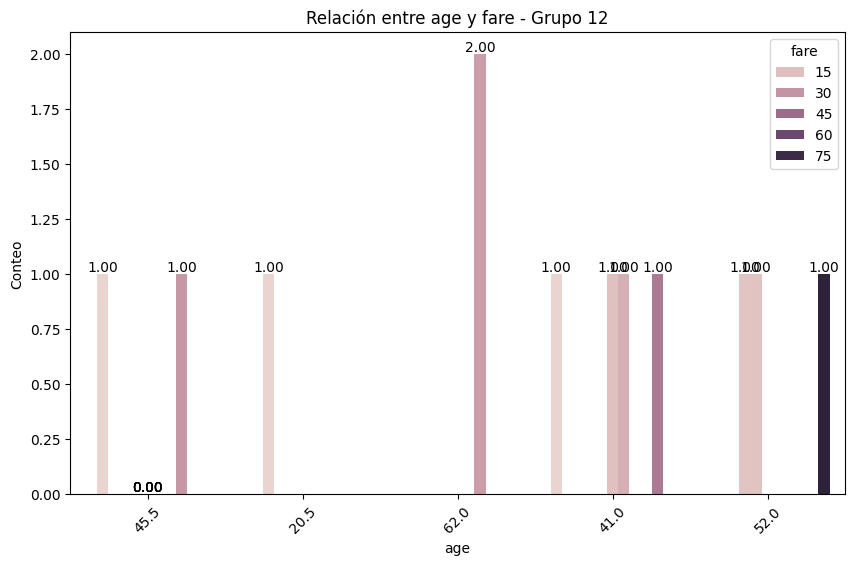

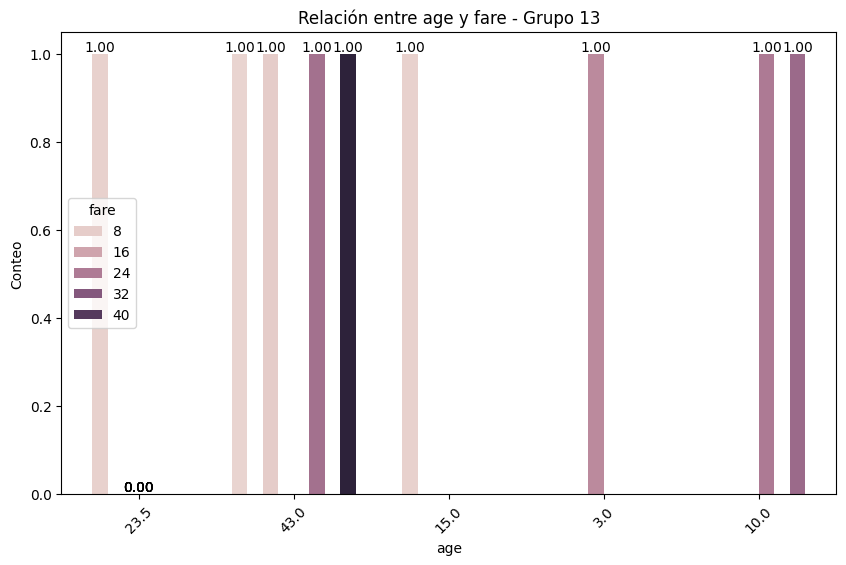

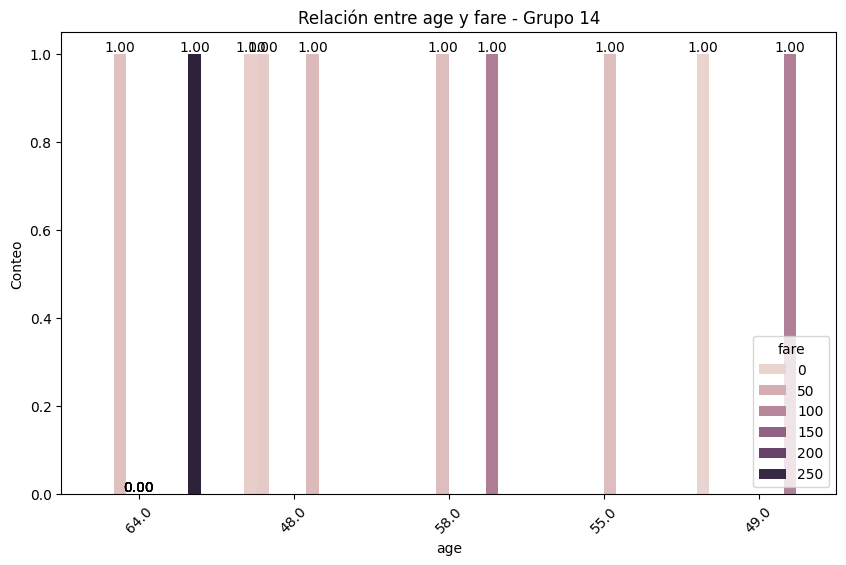

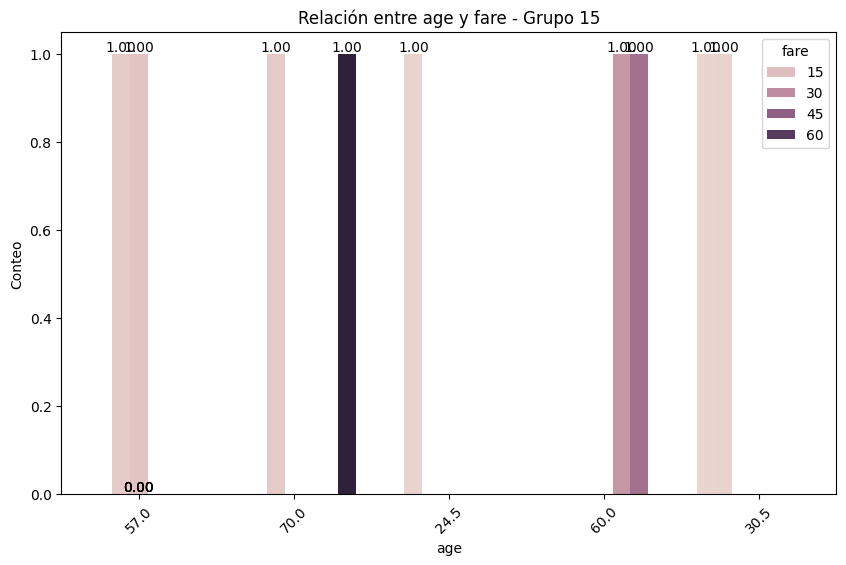

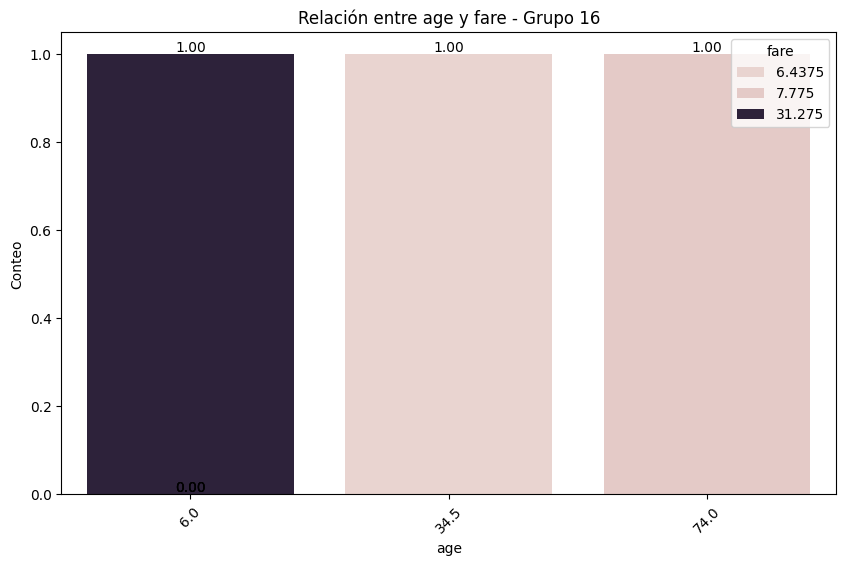

Supervivencia yes:


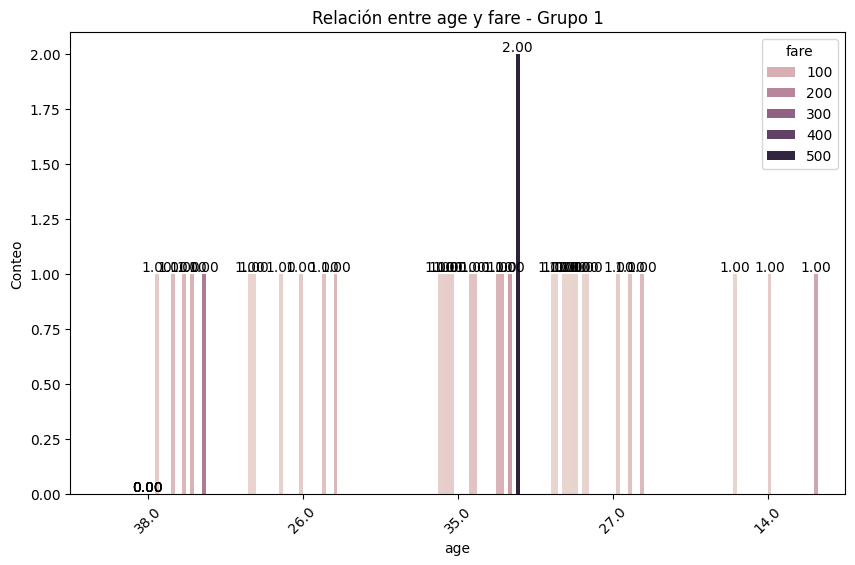

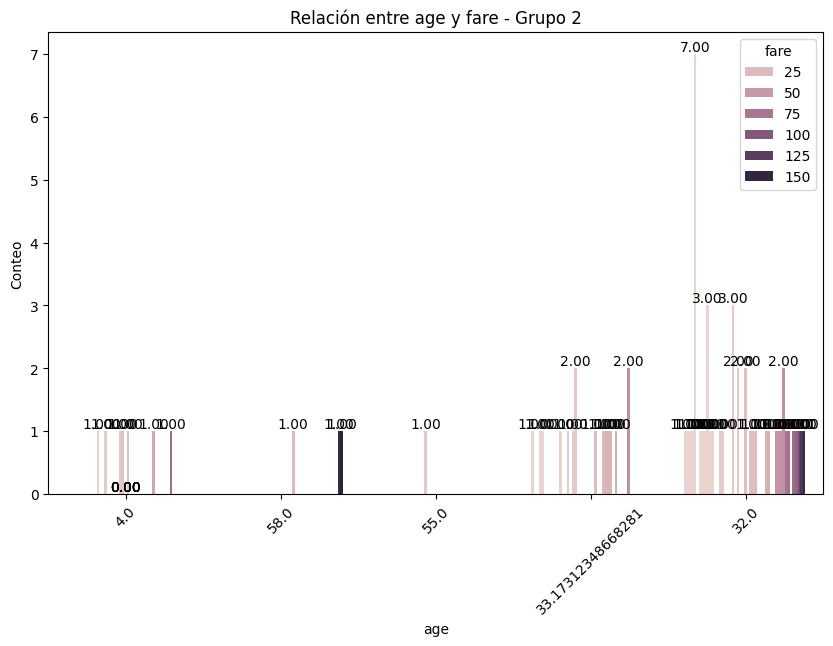

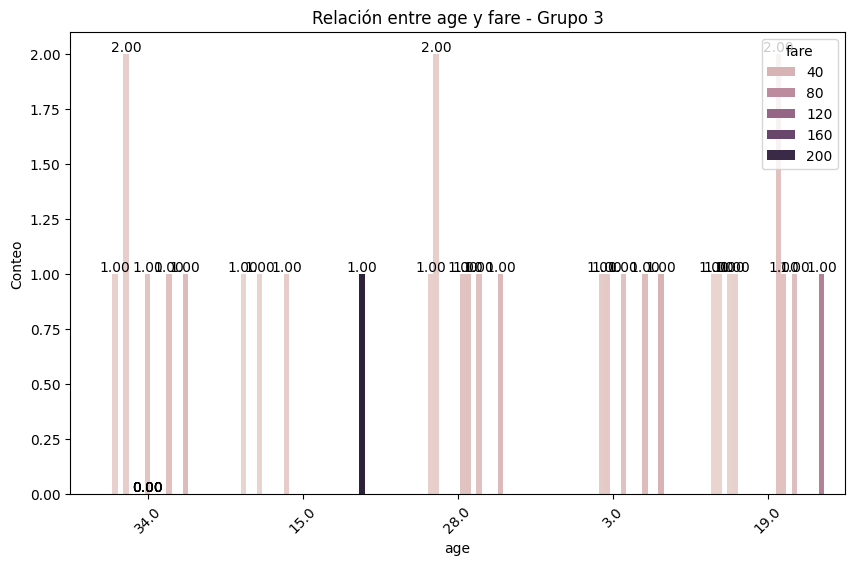

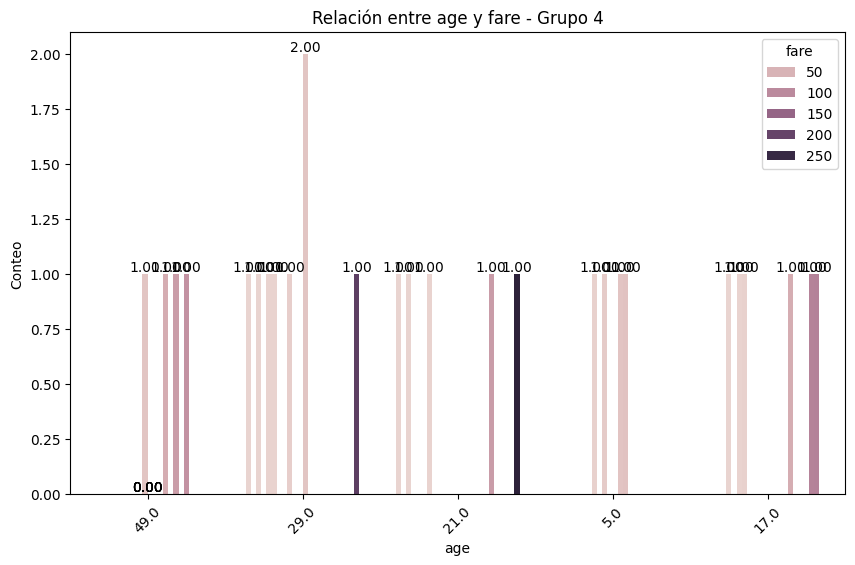

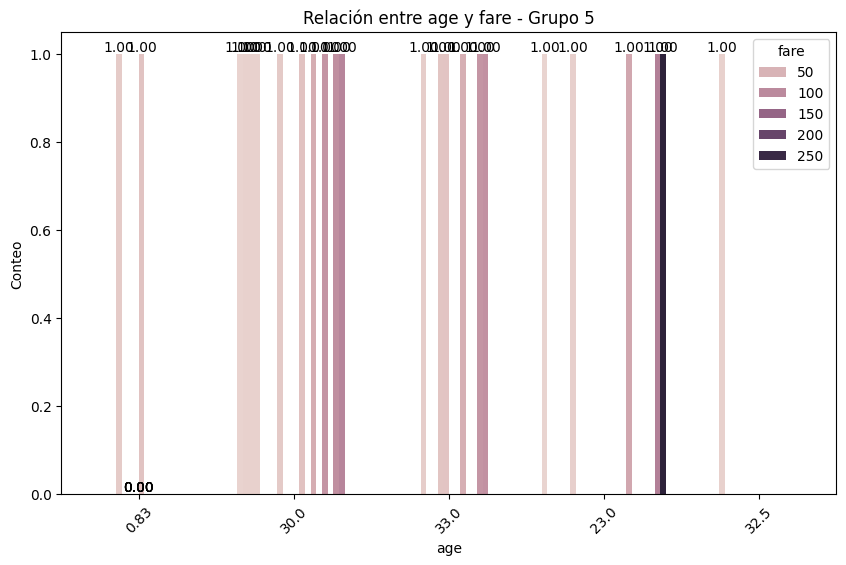

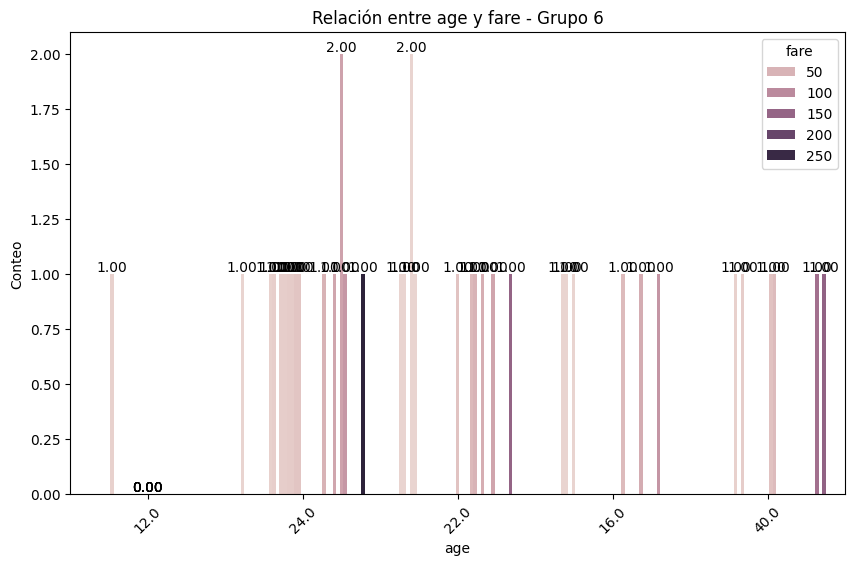

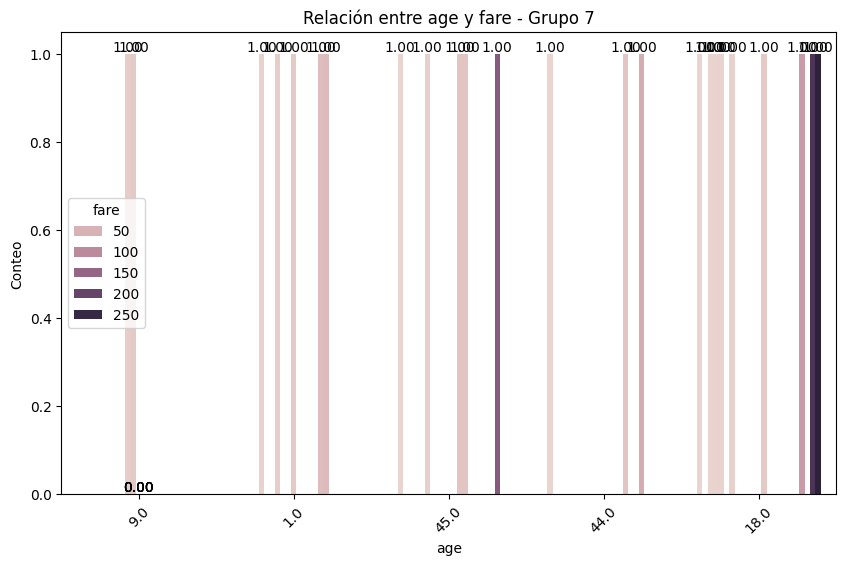

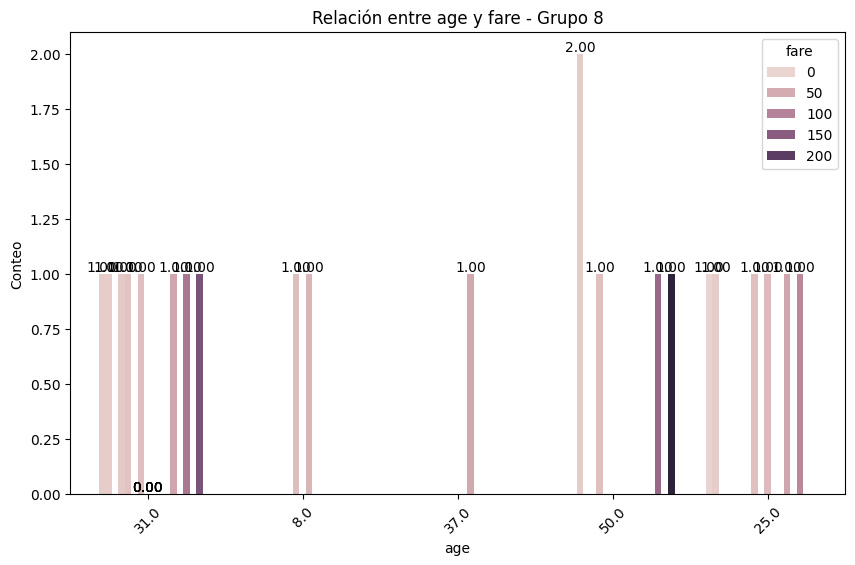

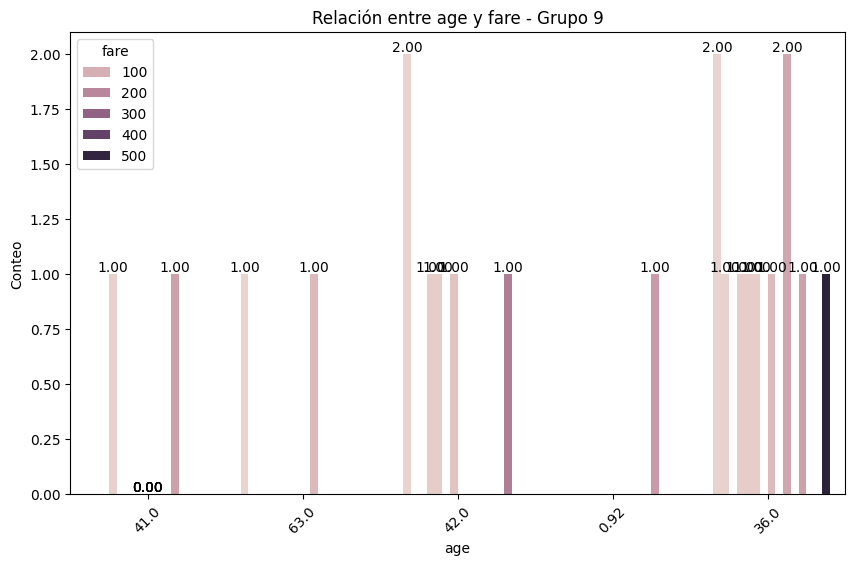

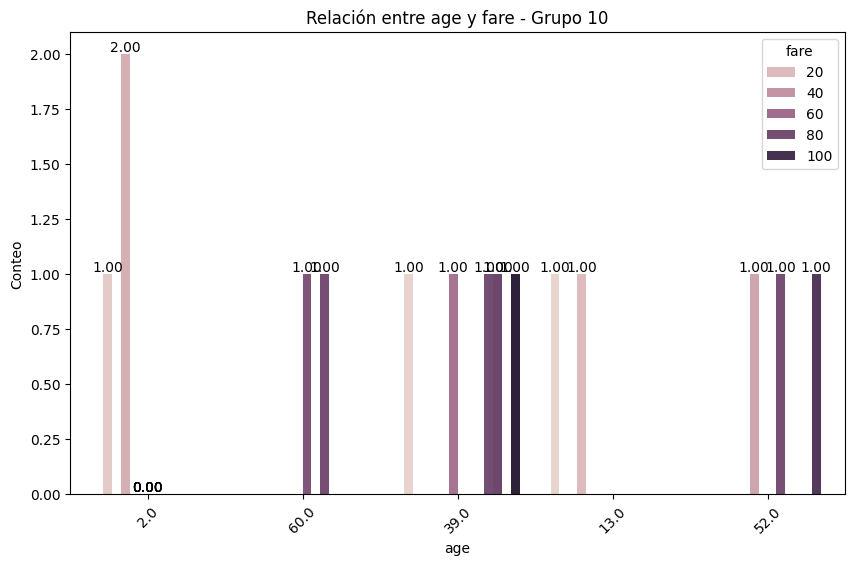

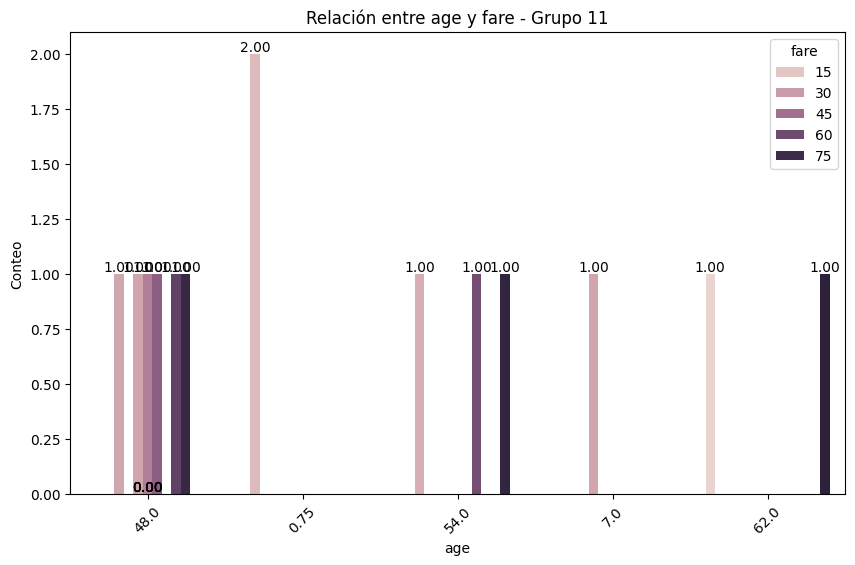

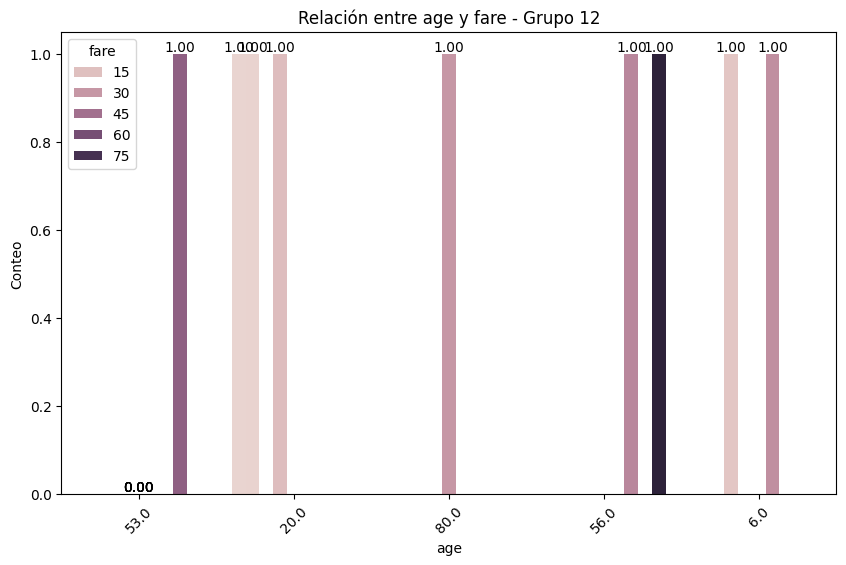

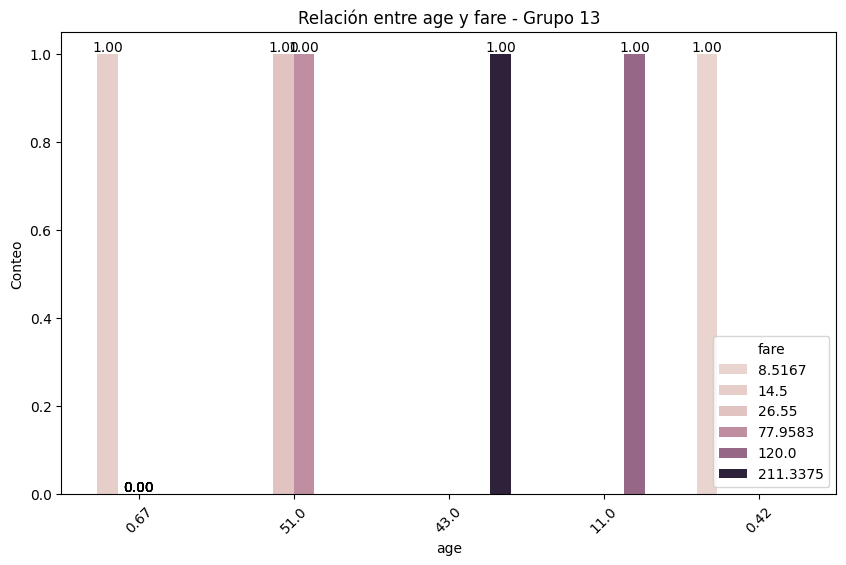

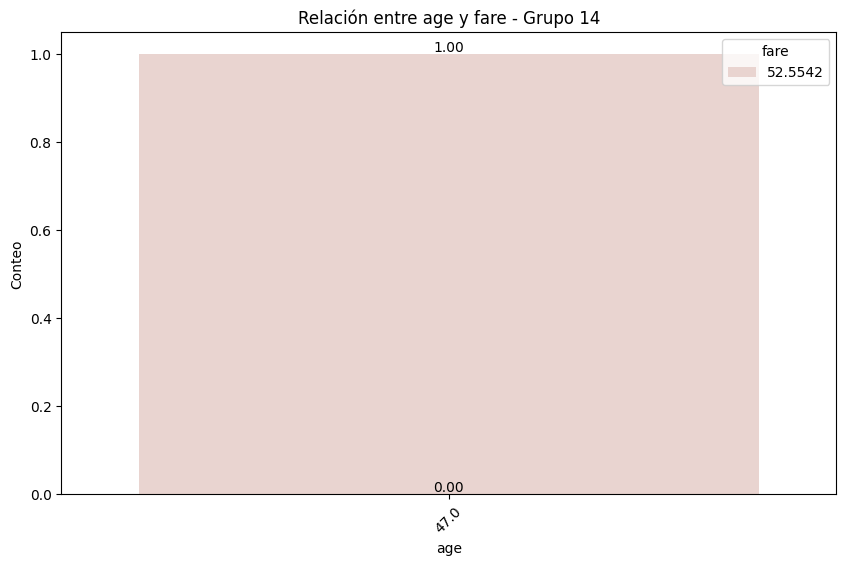

In [221]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Supervivencia {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1,show_values= True)

Supervivencia no:


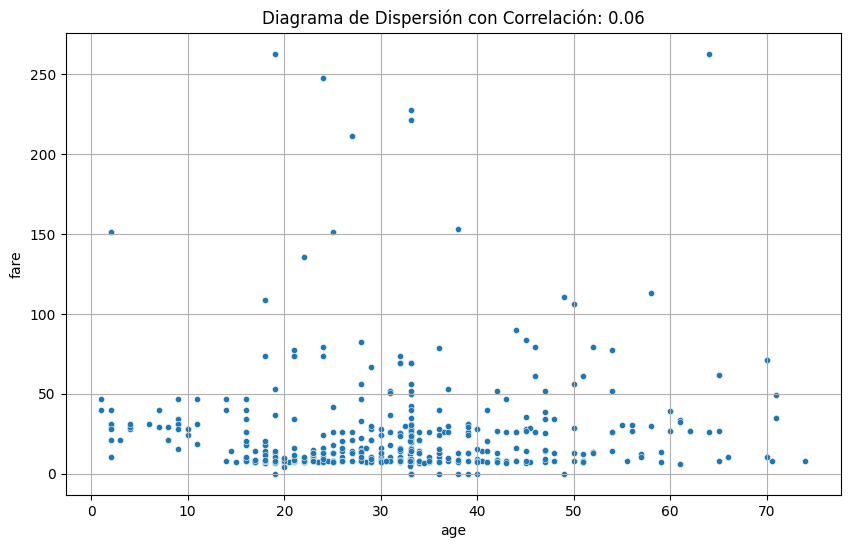

Supervivencia yes:


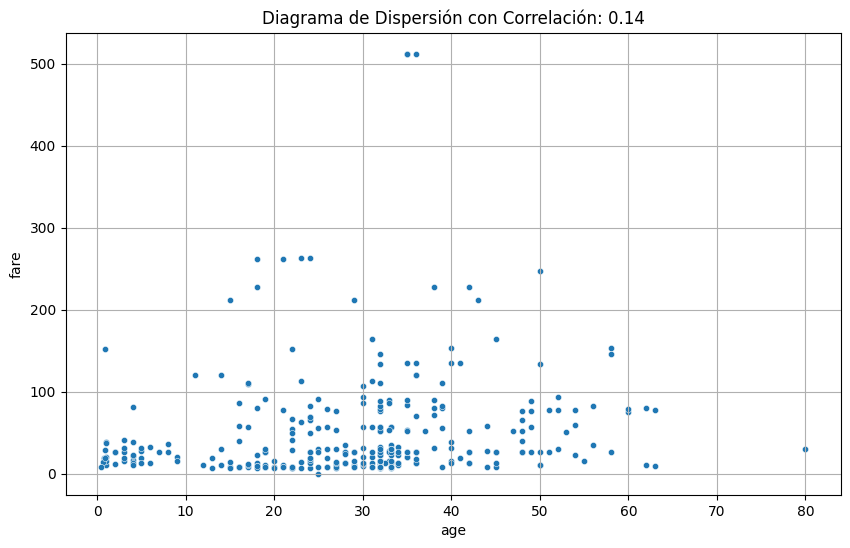

In [212]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Supervivencia {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)